In [64]:
import awkward as ak
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.colors import LogNorm
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
mpl.rcParams["image.cmap"] = "Blues"
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["figure.figsize"] = (7,4)

import h5py
import os
import numpy as np
from glob import glob
from math import ceil
import hist

import mplhep as hep
plt.style.use(hep.style.CMS)

In [146]:
inputdir_ele = "/work/dvalsecc/Clustering/dataset/electrons_awkward_2022v9_onlycalomatched/training/"
inputdir_gamma = "/work/dvalsecc/Clustering/dataset/gammas_awkward_2022v9_onlycalomatched/training/"
cols = ["cl_features", "seed_features", "cl_labels", "window_features", "window_metadata", "cl_h"]

N = 1000000
df_ele = ak.from_parquet(inputdir_ele, lazy=True, use_threads=True, columns=cols)[0:N]
df_gamma = ak.from_parquet(inputdir_gamma, lazy=True, use_threads=True, columns=cols)[0:N]

df = ak.concatenate([df_ele, df_gamma])

In [147]:
print(f"N. electron samples: {ak.num(df_ele['cl_features'], axis=0)}")
print(f"N. gamma samples: {ak.num(df_gamma['cl_features'], axis=0)}")

N. electron samples: 1000000
N. gamma samples: 1000000


In [253]:
output_folder = "./plots_check_input/"

# Dataset studies

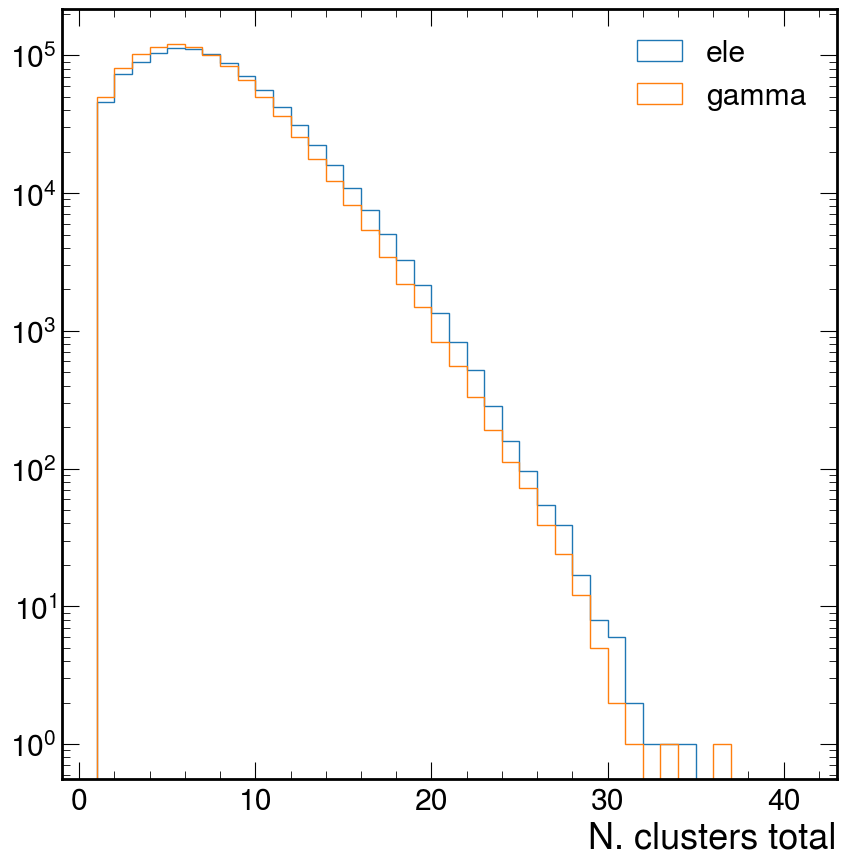

In [148]:
plt.hist(ak.num(df_ele.cl_features, axis=1), bins=40, range=(1, 41), histtype="step", label="ele")
plt.hist(ak.num(df_gamma.cl_features, axis=1), bins=40, range=(1, 41), histtype="step", label="gamma")
plt.yscale("log")
plt.xlabel("N. clusters total")
plt.legend()

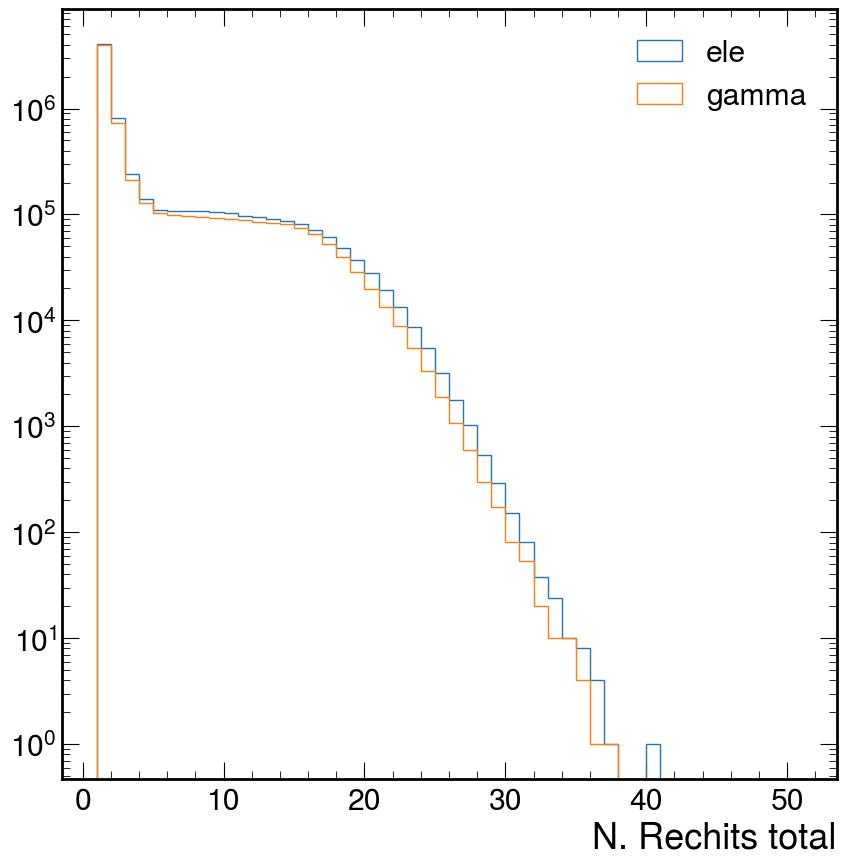

In [149]:
plt.hist(ak.flatten(ak.num(df_ele.cl_h, axis=2)), bins=50, range=(1, 51), histtype="step", label="ele")
plt.hist(ak.flatten(ak.num(df_gamma.cl_h, axis=2)), bins=50, range=(1, 51), histtype="step", label="gamma")
plt.yscale("log")
plt.xlabel("N. Rechits total")
plt.legend()

# Input features

In [16]:
default_features_dict = {
        "cl_features" : [ "en_cluster","et_cluster",
                        "cluster_eta", "cluster_phi", 
                        "cluster_ieta","cluster_iphi","cluster_iz",
                        "cluster_deta", "cluster_dphi",
                        "cluster_den_seed","cluster_det_seed",
                        "en_cluster_calib", "et_cluster_calib",
                        "cl_f5_r9", "cl_f5_sigmaIetaIeta", "cl_f5_sigmaIetaIphi",
                        "cl_f5_sigmaIphiIphi","cl_f5_swissCross",
                        "cl_r9", "cl_sigmaIetaIeta", "cl_sigmaIetaIphi",
                        "cl_sigmaIphiIphi","cl_swissCross",
                        "cl_nxtals", "cl_etaWidth","cl_phiWidth"],


    "cl_metadata": [ "calo_score", "calo_simen_sig", "calo_simen_PU",
                     "cluster_PUfrac","calo_nxtals_PU",
                     "noise_en","noise_en_uncal","noise_en_nofrac","noise_en_uncal_nofrac" ],

    "cl_labels" : ["is_seed","is_calo_matched","is_calo_seed", "in_scluster","in_geom_mustache","in_mustache"],

    
    "seed_features" : ["seed_eta","seed_phi", "seed_ieta","seed_iphi", "seed_iz", 
                     "en_seed", "et_seed","en_seed_calib","et_seed_calib",
                    "seed_f5_r9","seed_f5_sigmaIetaIeta", "seed_f5_sigmaIetaIphi",
                    "seed_f5_sigmaIphiIphi","seed_f5_swissCross",
                    "seed_r9","seed_sigmaIetaIeta", "seed_sigmaIetaIphi",
                    "seed_sigmaIphiIphi","seed_swissCross",
                    "seed_nxtals","seed_etaWidth","seed_phiWidth"
                    ],

    "seed_metadata": [ "seed_score", "seed_simen_sig", "seed_simen_PU", "seed_PUfrac"],
    "seed_labels" : [ "is_seed_calo_matched", "is_seed_calo_seed", "is_seed_mustache_matched"],

     "window_features" : [ "max_en_cluster","max_et_cluster","max_deta_cluster","max_dphi_cluster","max_den_cluster","max_det_cluster",
                         "min_en_cluster","min_et_cluster","min_deta_cluster","min_dphi_cluster","min_den_cluster","min_det_cluster",
                         "mean_en_cluster","mean_et_cluster","mean_deta_cluster","mean_dphi_cluster","mean_den_cluster","mean_det_cluster" ],

    "window_metadata": ["flavour", "ncls", "nclusters_insc",
                        "nVtx", "rho", "obsPU", "truePU",
                        "sim_true_eta", "sim_true_phi",  
                        "gen_true_eta","gen_true_phi",
                        "en_true_sim","et_true_sim", "en_true_gen", "et_true_gen",
                        "en_true_sim_good", "et_true_sim_good",
                        "en_mustache_raw", "et_mustache_raw","en_mustache_calib", "et_mustache_calib",
                        "max_en_cluster_insc","max_deta_cluster_insc","max_dphi_cluster_insc",
                        "event_tot_simen_PU","wtot_simen_PU","wtot_simen_sig" ],
}

## Features normalization

In [42]:
stats = {}

for cl_f in default_features_dict["cl_features"]:
    m = ak.mean(df.cl_features[cl_f])
    s = ak.std(df.cl_features[cl_f])
    mmin = ak.min(df.cl_features[cl_f])
    mmax = ak.max(df.cl_features[cl_f])
    stats[cl_f] = { "mean": m, "std":s, "min": mmin, "max": mmax}
    print(f"Feature: {cl_f}, mean: {m}, std: {s}")

Feature: en_cluster, mean: 25.142429199515206, std: 81.16968281350134
Feature: et_cluster, mean: 7.990660142490261, std: 19.985139138614272
Feature: cluster_eta, mean: 0.0027104192579129375, std: 1.5127865328282526
Feature: cluster_phi, mean: -0.007024130314298923, std: 1.809287796913242
Feature: cluster_ieta, mean: 18.724459559228833, std: 50.9487576190586
Feature: cluster_iphi, mean: 132.98038857243367, std: 104.76315781419672
Feature: cluster_iz, mean: 0.0011830718178510683, std: 0.6053862115037475
Feature: cluster_deta, mean: 0.023082036248760096, std: 0.0780999985075164
Feature: cluster_dphi, mean: -0.00015769281121118557, std: 0.3238633038166882
Feature: cluster_den_seed, mean: 95.91379353482566, std: 110.78231272159142
Feature: cluster_det_seed, mean: 38.608544474544715, std: 29.812137387401517
Feature: en_cluster_calib, mean: 27.074764039507674, std: 87.60272654837362
Feature: et_cluster_calib, mean: 8.493625369603471, std: 20.85381770698863
Feature: cl_f5_r9, mean: 2.691293578

In [27]:
def std_scaling(X, cl_f, range=(0,1)):
    mean = stats[cl_f]["mean"]
    std = stats[cl_f]["std"]
    return (X-mean)/std

def min_max_scaling(X, cl_f, range=(0,1)):
    mmax = stats[cl_f]["max"]
    mmin = stats[cl_f]["min"]
    X_std = (X - mmin) / (mmax - mmin)
    X_scaled = X_std * (range[1]-range[0]) + range[0]
    return X_scaled

## Input features plots

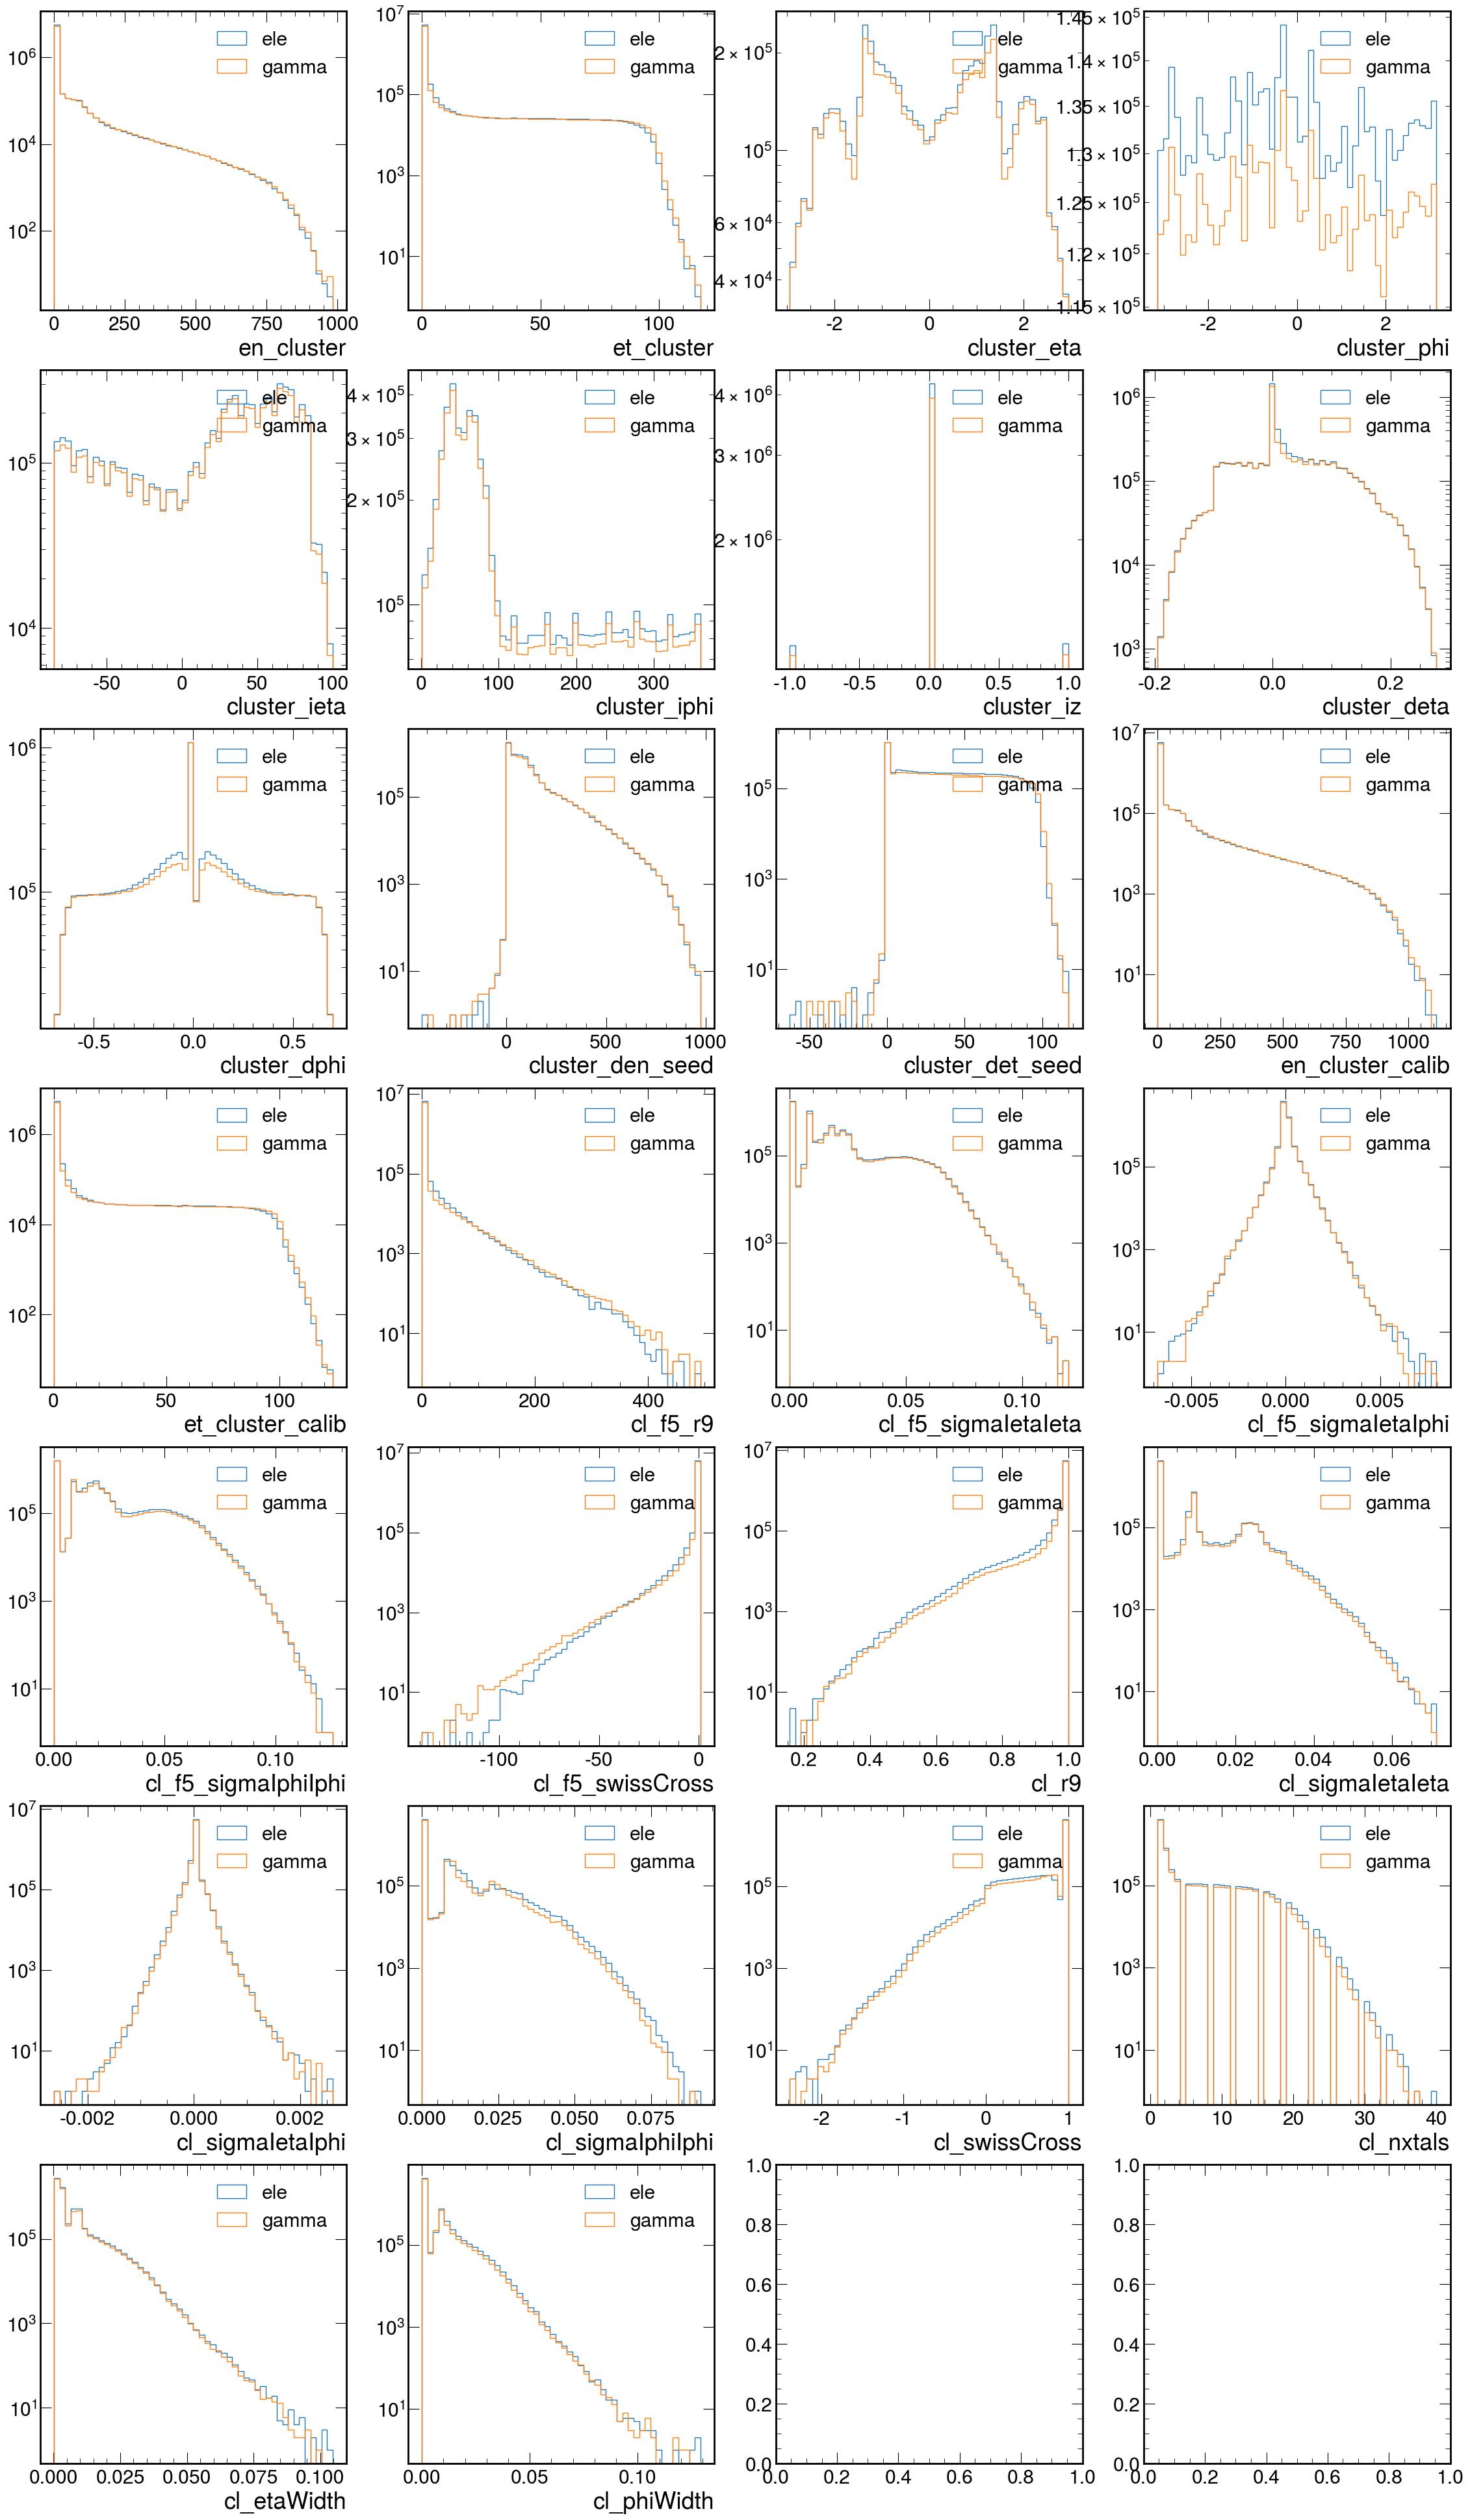

In [160]:
cols = 4
rows = ceil(len(default_features_dict["cl_features"]) / cols)

fig, axs = plt.subplots(rows, cols, figsize=(7*cols, 7*rows))

for iplot, cl_f in enumerate(default_features_dict["cl_features"]):
    ax = axs[iplot//cols][iplot % cols]
    count,bins, _ = ax.hist(ak.flatten(df_ele.cl_features[cl_f]), bins=50, histtype="step", label="ele")
    ax.hist(ak.flatten(df_gamma.cl_features[cl_f]), bins=bins, histtype="step", label="gamma")
    ax.legend()
    ax.set_yscale("log")
    ax.set_xlabel(cl_f)
    

### Features with std-scaling

/work/dvalsecc/miniconda3/envs/clustering_tf2.3/lib/python3.8/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(


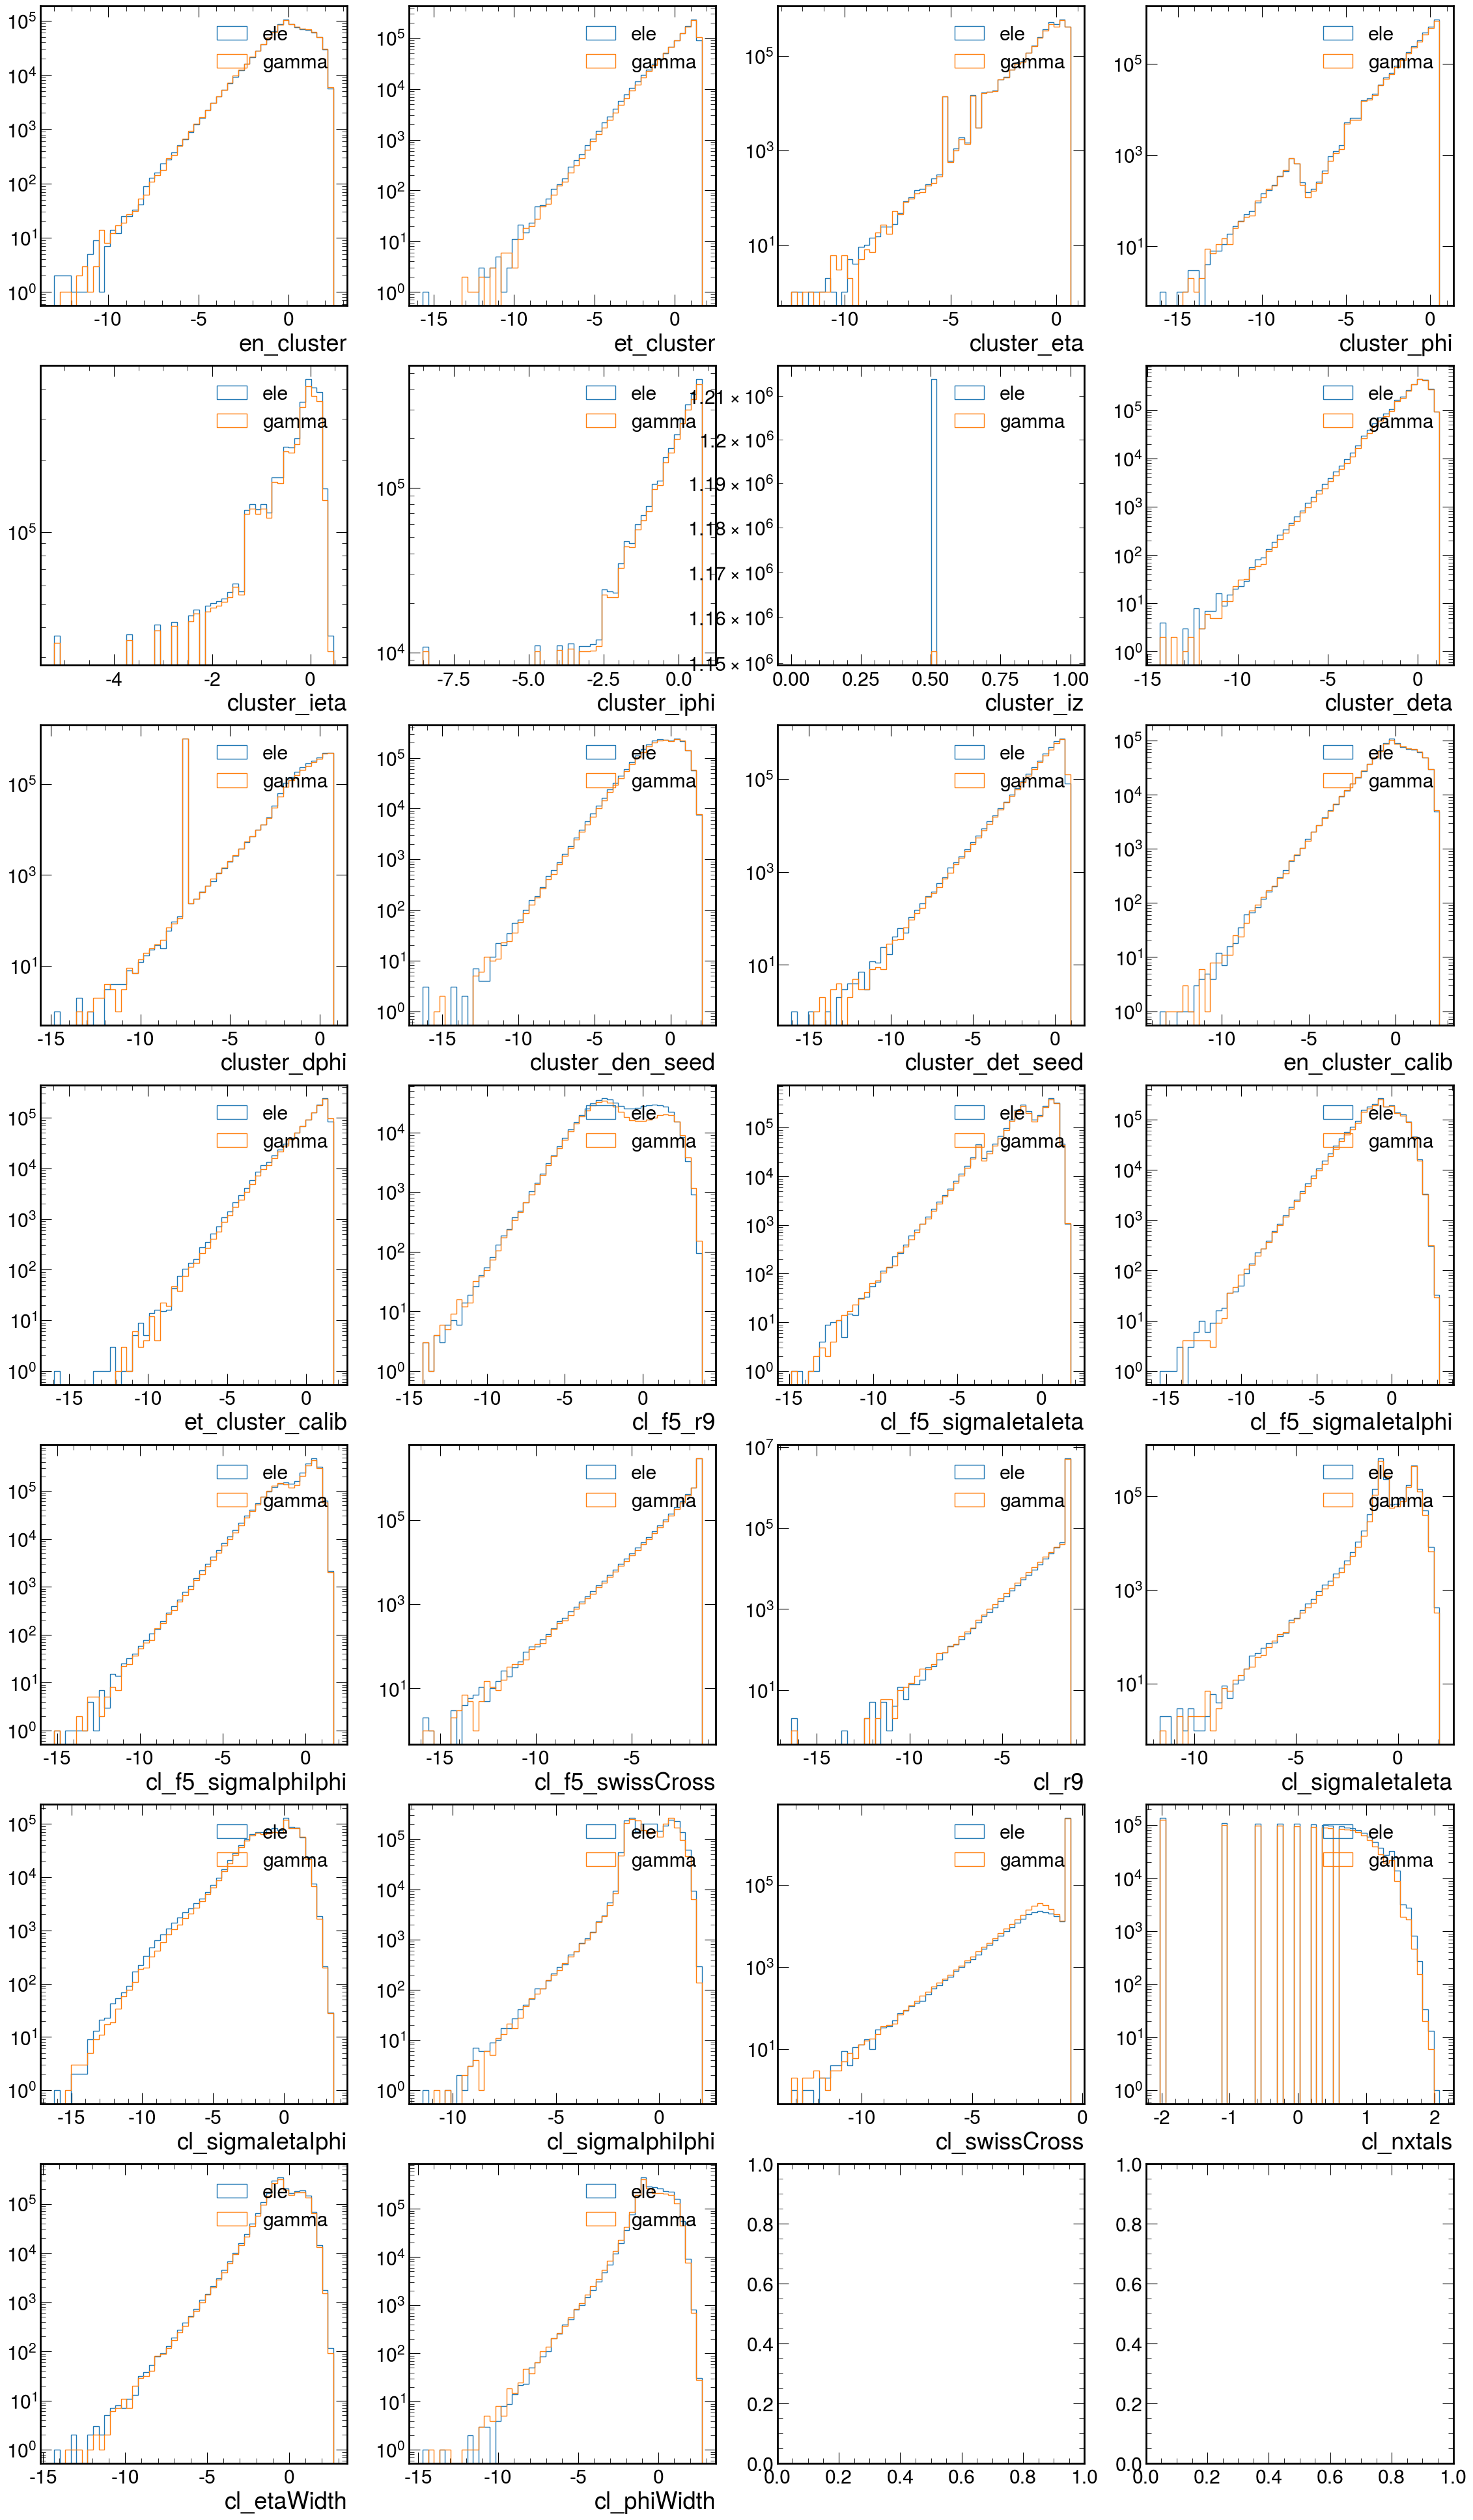

In [161]:
cols = 4
rows = ceil(len(default_features_dict["cl_features"]) / cols)

fig, axs = plt.subplots(rows, cols, figsize=(7*cols, 7*rows))

for iplot, cl_f in enumerate(default_features_dict["cl_features"]):
    ax = axs[iplot//cols][iplot % cols]
    count,bins, _ = ax.hist(np.log(std_scaling(ak.flatten(df_ele.cl_features[cl_f]), cl_f)+ 1e-5), bins=50, histtype="step", label="ele")
    ax.hist(np.log(std_scaling(ak.flatten(df_gamma.cl_features[cl_f]), cl_f)+ 1e-5), bins=bins, histtype="step", label="gamma")
    ax.legend()
    ax.set_yscale("log")
    ax.set_xlabel(cl_f)

### Features with min-max scaling

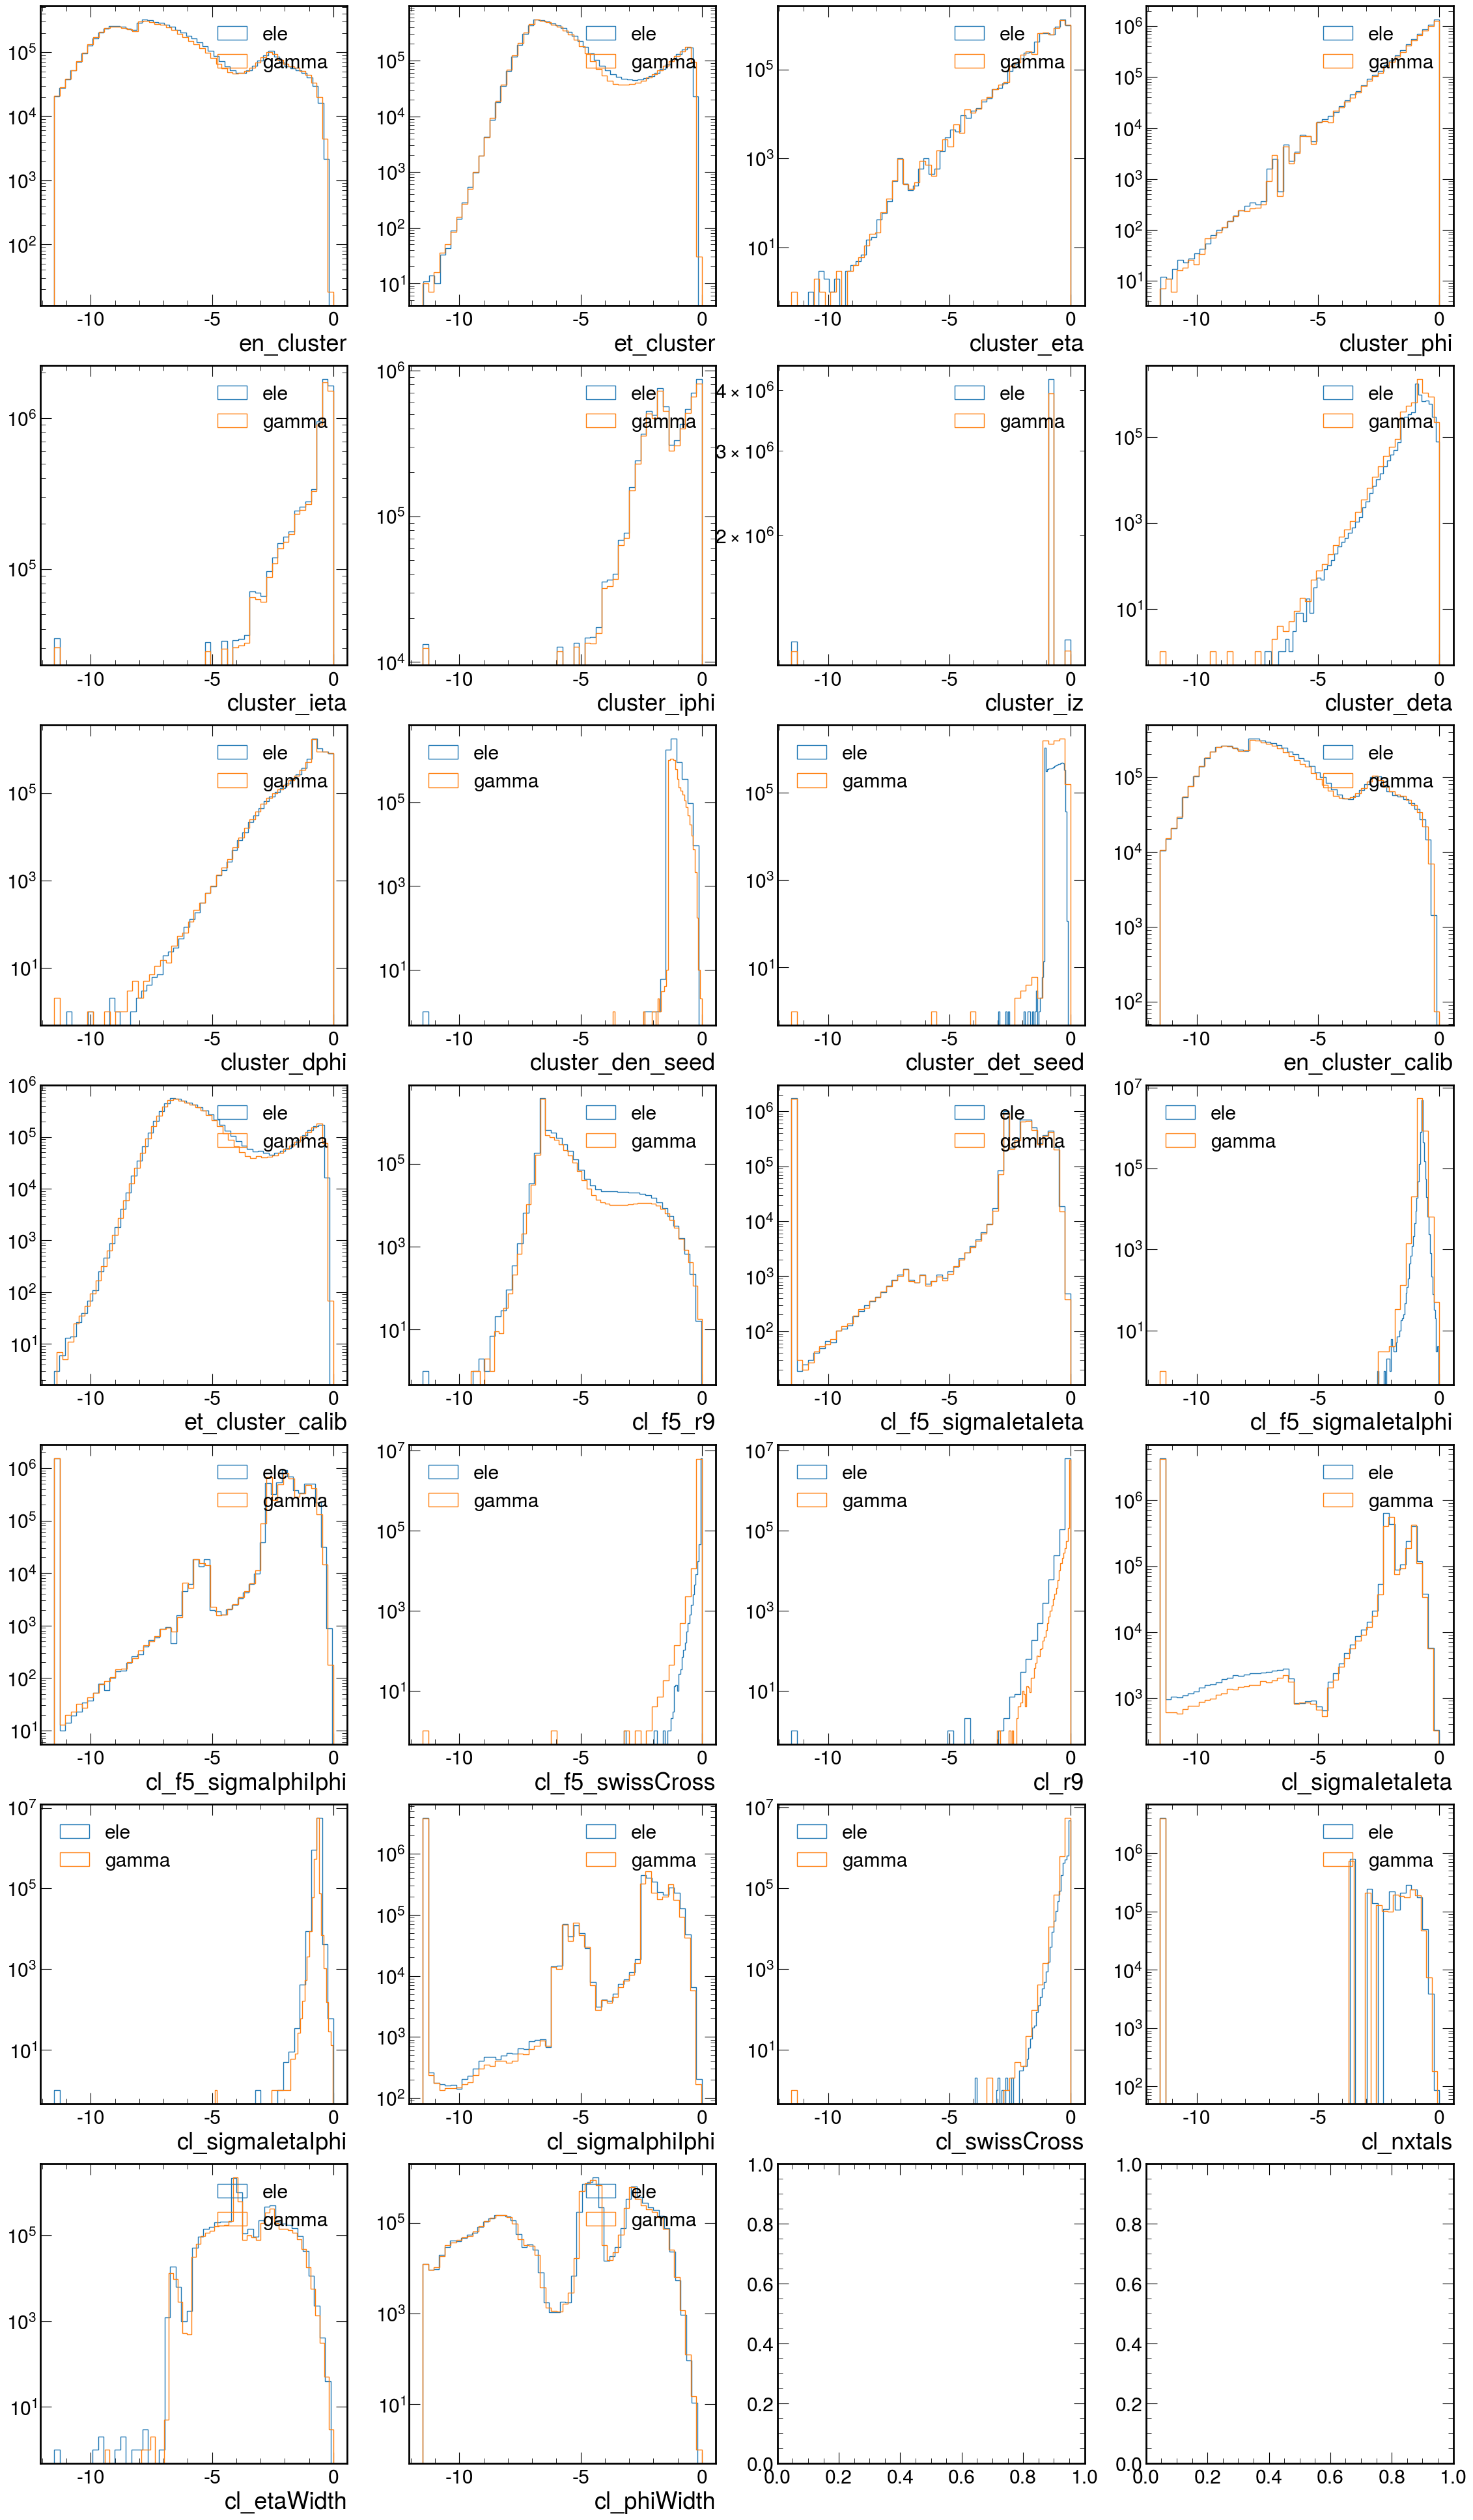

In [162]:
cols = 4
rows = ceil(len(default_features_dict["cl_features"]) / cols)

fig, axs = plt.subplots(rows, cols, figsize=(7*cols, 7*rows))

for iplot, cl_f in enumerate(default_features_dict["cl_features"]):
    ax = axs[iplot//cols][iplot % cols]
    ax.hist(np.log(min_max_scaling(ak.flatten(df_ele.cl_features[cl_f]), cl_f)+ 1e-5), bins=50, histtype="step", label="ele")
    ax.hist(np.log(min_max_scaling(ak.flatten(df_gamma.cl_features[cl_f]), cl_f)+ 1e-5), bins=50, histtype="step", label="gamma")
    ax.legend()
    ax.set_yscale("log")
    ax.set_xlabel(cl_f)

### Plot rechits detector window

In [14]:
def plot_window_rechits(df):
    d = 5
    xmin = ak.min(df[:,:,1])-d
    xmax = ak.max(df[:,:,1])+d
    ymin = ak.min(df[:,:,0])-d
    ymax = ak.max(df[:,:,0])+d
    plt.hist2d(ak.flatten(df[:,:,1]), ak.flatten(df[:,:,0]), weights=ak.flatten(df[:,:,3]), range=((xmin, xmax), (ymin, ymax)), bins=(int(xmax-xmin), int(ymax-ymin)), norm=LogNorm(), cmap="viridis")
    plt.ylabel("ieta")
    plt.xlabel("iphi")
    plt.colorbar(label="Rechit Energy [GeV]")
    plt.show()

# Delta Energy seed investigation
Only in some cases the seed has a lower energy than the cluster --> this can happen when the window is not symmetric in dEta, towards the endcap

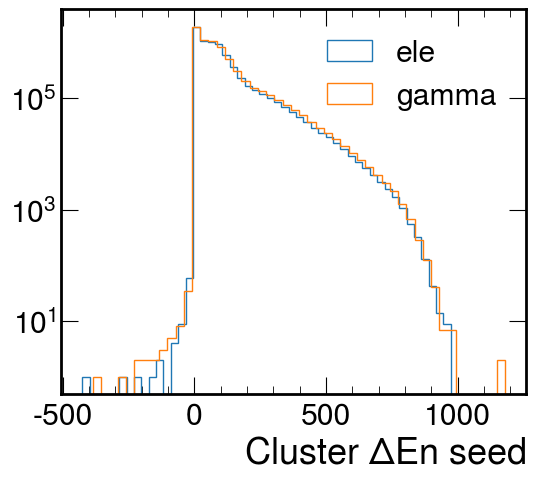

In [48]:
plt.figure(figsize=(6,5))
plt.hist(ak.flatten(df_ele.cl_features.cluster_den_seed), bins=50, histtype="step", label="ele")
plt.hist(ak.flatten(df_gamma.cl_features.cluster_den_seed), bins=50,  histtype="step", label="gamma")
plt.yscale("log")
plt.xlabel("Cluster $\Delta En$ seed")
plt.legend()

In [49]:
mask = df.cl_features.cluster_den_seed < 0 

Text(1, 0, 'Cluster $\\eta$')

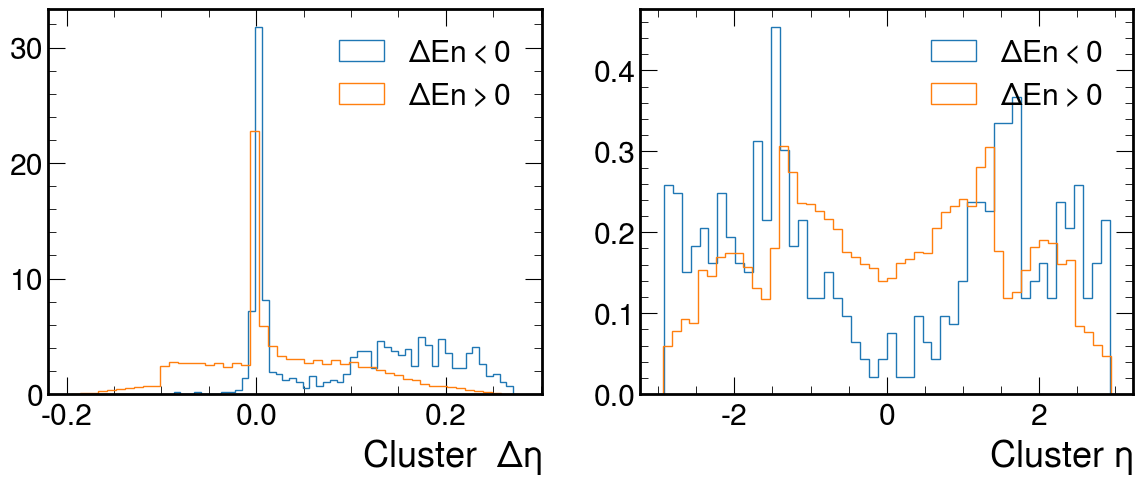

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(14,5))
axs[0].hist(ak.flatten(df.cl_features.cluster_deta[mask]), bins=50, histtype="step", label="$\Delta En < 0$", density=True)
axs[0].hist(ak.flatten(df.cl_features.cluster_deta[~mask]), bins=50, histtype="step", label="$\Delta En > 0$", density=True)
axs[0].legend()
axs[0].set_xlabel("Cluster  $\Delta \eta$")

axs[1].hist(ak.flatten(df.cl_features.cluster_eta[mask]), bins=50, histtype="step", label="$\Delta En < 0$", density=True)
axs[1].hist(ak.flatten(df.cl_features.cluster_eta[~mask]), bins=50, histtype="step", label="$\Delta En > 0$", density=True)
axs[1].legend()
axs[1].set_xlabel("Cluster $\eta$")

# Electron / photons comparison in the training dataset

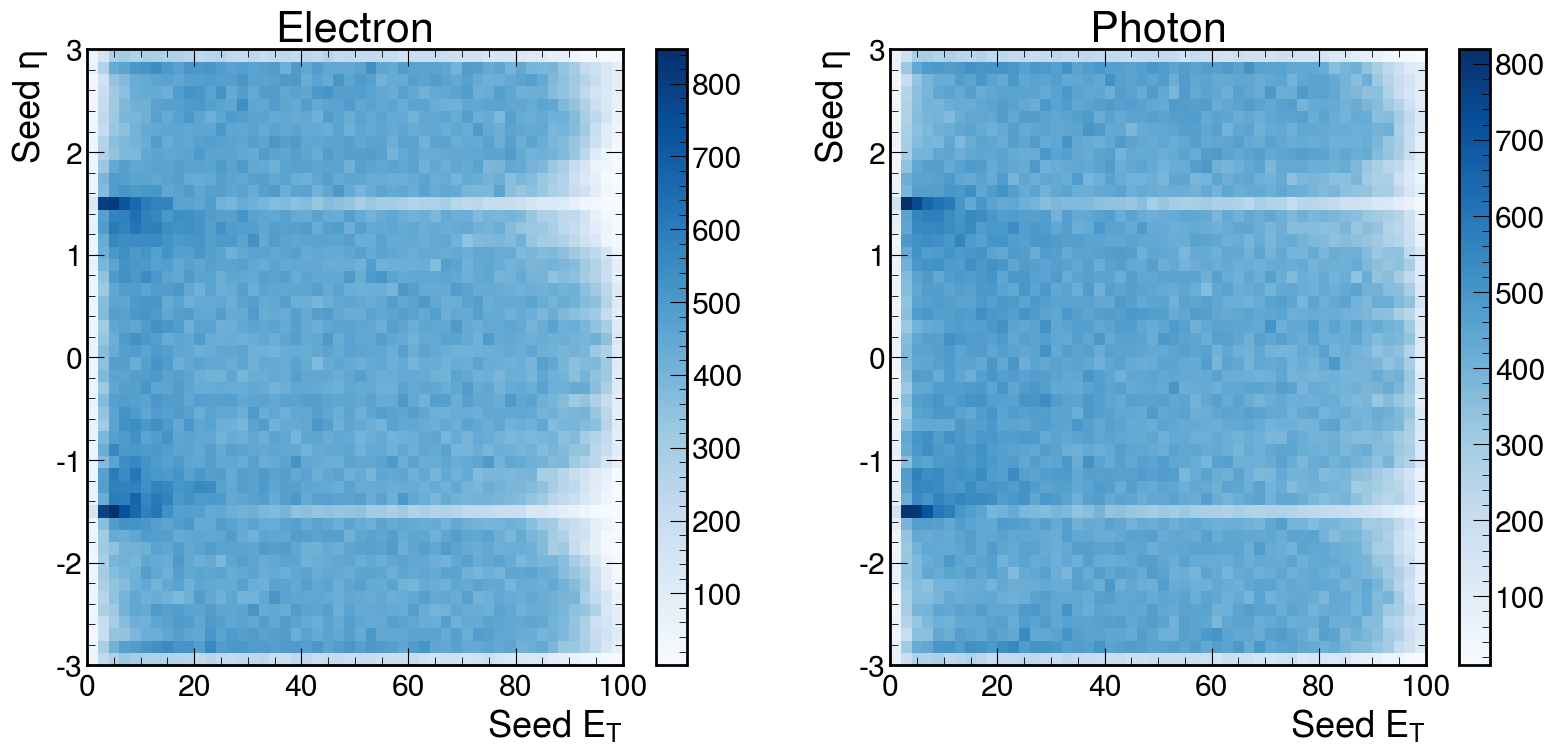

In [260]:
f, (ax,ay) = plt.subplots(1,2,figsize=(19,8), dpi=100)
c, h, b , I =  ax.hist2d(ak.to_numpy(df_ele.seed_features.et_seed),ak.to_numpy(df_ele.seed_features.seed_eta), 
          range=((0., 100.),(-3,3)), bins=50)
ax.set_xlabel("Seed $E_T$")
ax.set_ylabel("Seed $\eta$")
ax.set_title("Electron")
plt.colorbar(I, ax=ax)

c, h, b , I =  ay.hist2d(ak.to_numpy(df_gamma.seed_features.et_seed),ak.to_numpy(df_gamma.seed_features.seed_eta), 
          range=((0., 100.),(-3,3)), bins=50)
ay.set_xlabel("Seed $E_T$")
ay.set_ylabel("Seed $\eta$")
ay.set_title("Photon")
plt.colorbar(I, ax=ay)

f.savefig(output_folder + f"/seed_eta_et_comparison.png")
f.savefig(output_folder + f"/seed_eta_et_comparison.pdf")
f.savefig(output_folder + f"/seed_eta_et_comparison.svg")

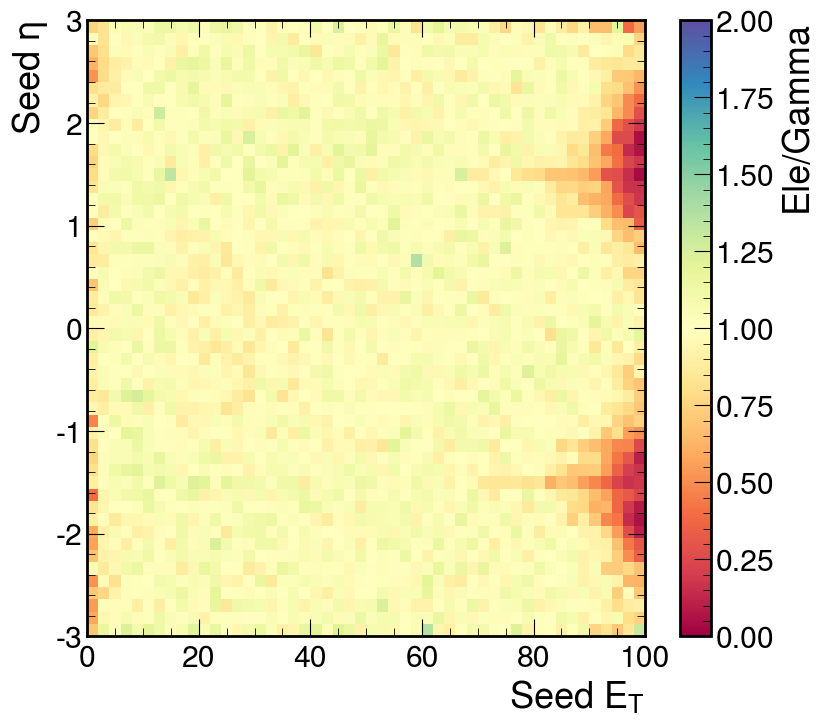

In [261]:
f, ax, = plt.subplots(1,figsize=(9,8), dpi=100)
c_ele, bx, by  = np.histogram2d(ak.to_numpy(df_ele.seed_features.et_seed),ak.to_numpy(df_ele.seed_features.seed_eta), 
          range=((0., 100.),(-3,3)), bins=50)
c_gamma, bx, by  = np.histogram2d(ak.to_numpy(df_gamma.seed_features.et_seed),ak.to_numpy(df_gamma.seed_features.seed_eta), 
          range=((0., 100.),(-3,3)), bins=50)

r = c_ele / c_gamma

mesh = ax.pcolormesh(bx, by, r.T, cmap="Spectral", vmin=0, vmax=2)

ax.set_xlabel("Seed $E_T$")
ax.set_ylabel("Seed $\eta$")
plt.colorbar(mesh,ax=ax, label="Ele/Gamma")

f.savefig(output_folder + f"/seed_eta_et_comparison_ratio.png")
f.savefig(output_folder + f"/seed_eta_et_comparison_ratio.pdf")
f.savefig(output_folder + f"/seed_eta_et_comparison_ratio.svg")

In [203]:
def plot_comparison(dfA,dfB, var, label, bins, xrange, output_folder, ylog=False):
    os.makedirs(output_folder, exist_ok=True)

    fig = plt.figure(figsize=(8,9), dpi=200)
    gs = fig.add_gridspec(2,1, height_ratios=[0.75,0.25])
    axs = gs.subplots(sharex=True)
    
    ax =  axs[0]
    axr =  axs[1]
    
    A, binX, _ = ax.hist(ak.to_numpy(dfA[var]), bins=bins, range=xrange, 
                         label="Electron", histtype="step", linewidth=2)
    B, binX, _ = ax.hist(ak.to_numpy(dfB[var]), bins=bins, range=xrange, 
                         label="Photon", histtype="step", linewidth=2)

    ax.legend()
    axr.set_xlabel(label)
    hep.cms.label(rlabel="14 TeV", loc=0, ax=ax)
    mmax = max([max(A), max(B)])
    if ylog:
        ax.set_ylim(max([min(A), min(B),1e-3]), mmax*500)
        ax.set_yscale("log")
    else:
        ax.set_ylim(0, mmax*1.4)

    errA = np.sqrt(A)
    errB = np.sqrt(B)
    errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)

    axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
                                fmt=".", linestyle='none', elinewidth=1, c="black")

    deltaM = np.max(np.abs((A/B)-1))
    if np.isnan(deltaM):
        deltaM = 2

    axr.set_ylim(max(0, 1-deltaM*1.2), (1+deltaM)*1.1)
    axr.set_ylabel("D/M")
    axr.grid(which="both",axis="y")
    axr.plot([binX[0], binX[-2]], [1.,1.], linewidth=2, c="black")


    fig.savefig(output_folder + f"/{var}_comparison.png")
    fig.savefig(output_folder + f"/{var}_comparison.pdf")
    fig.savefig(output_folder + f"/{var}_comparison.svg")
    


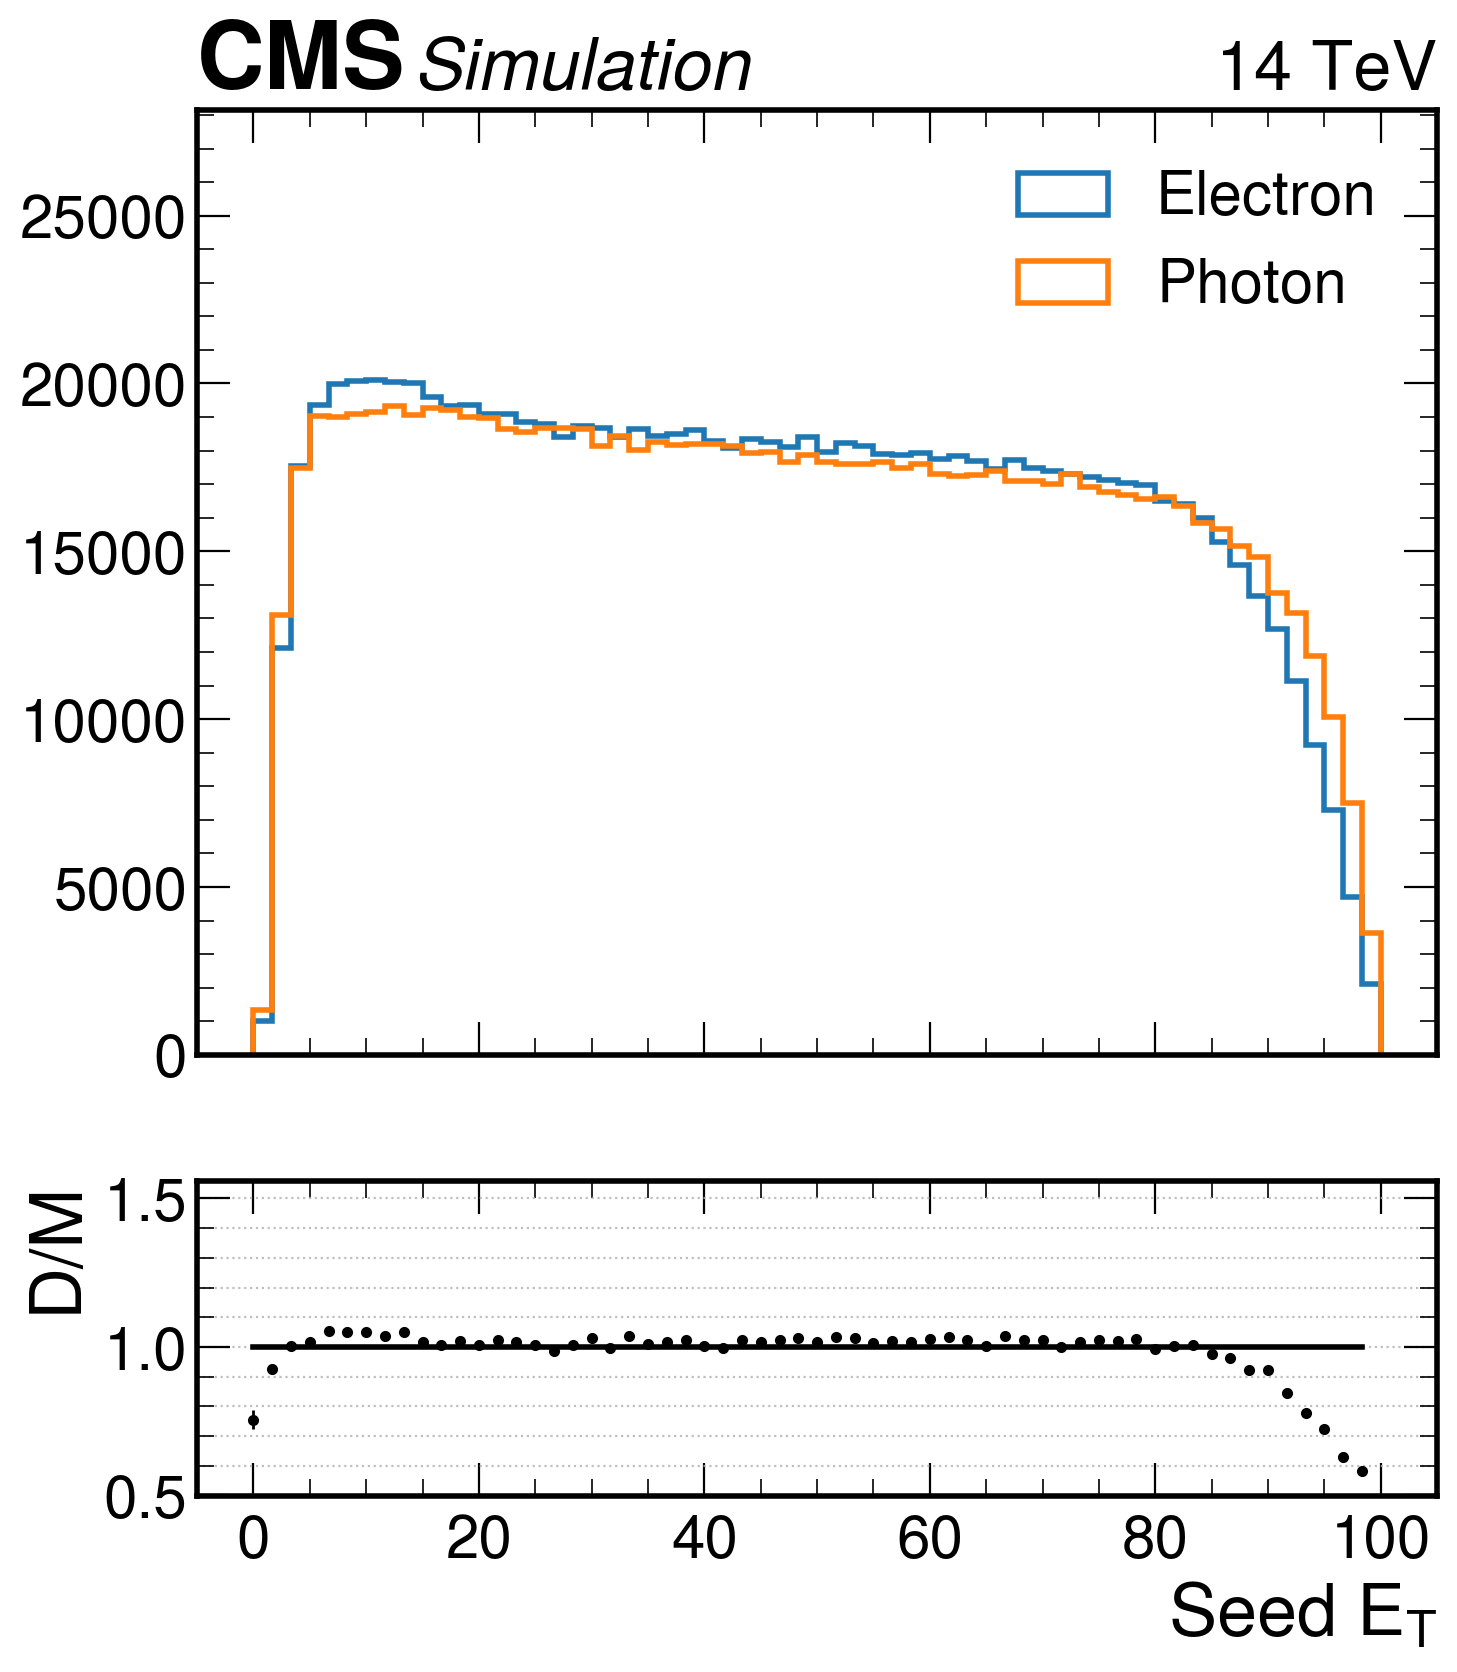

In [204]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="et_seed", label="Seed $E_T$", bins=60, xrange=(0, 100),
                output_folder="./plots_check_input")

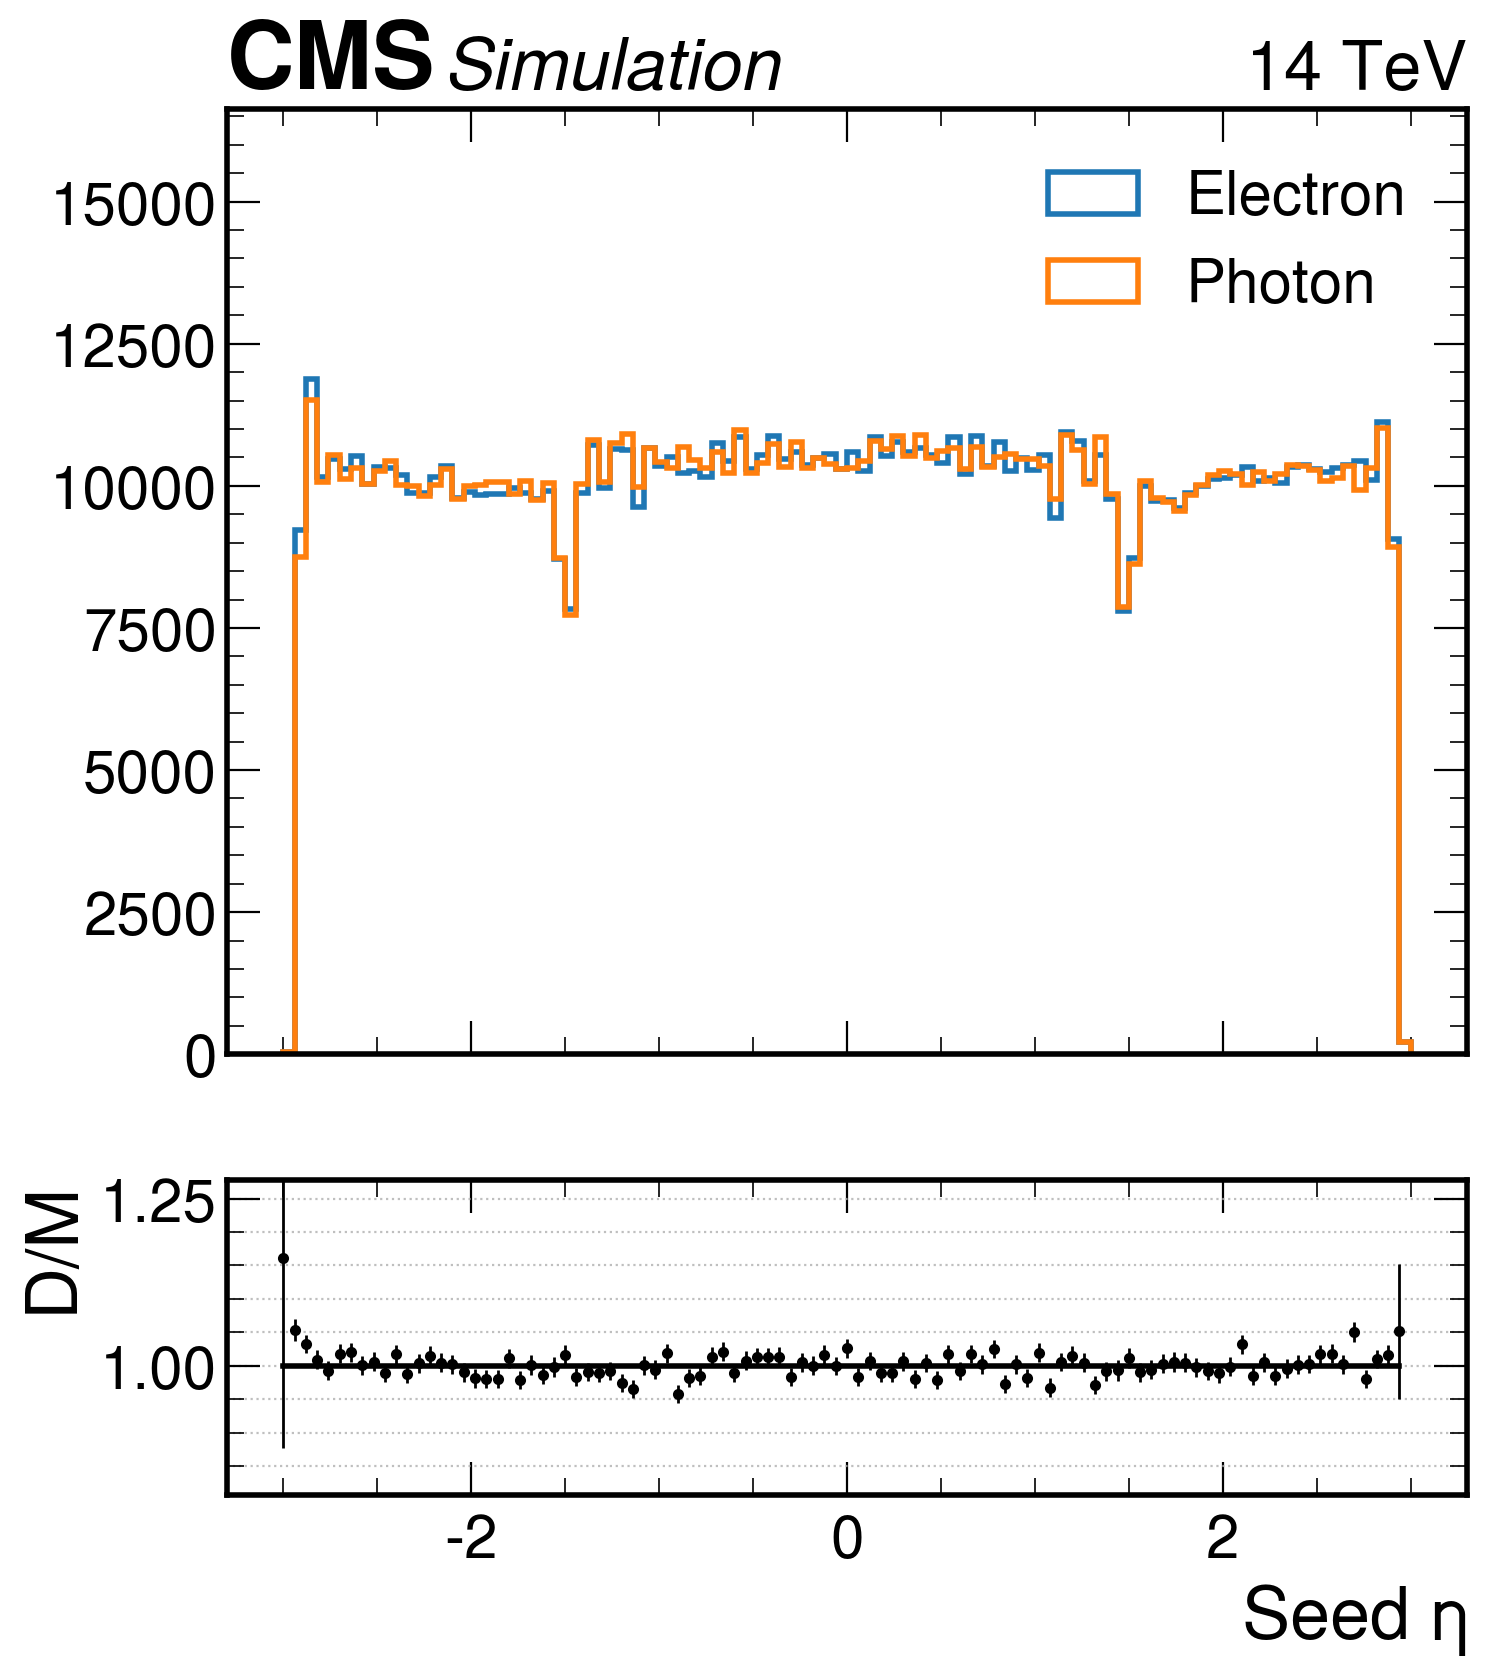

In [205]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="seed_eta", label="Seed $\eta$", bins=100, xrange=(-3, 3),
                output_folder="./plots_check_input")

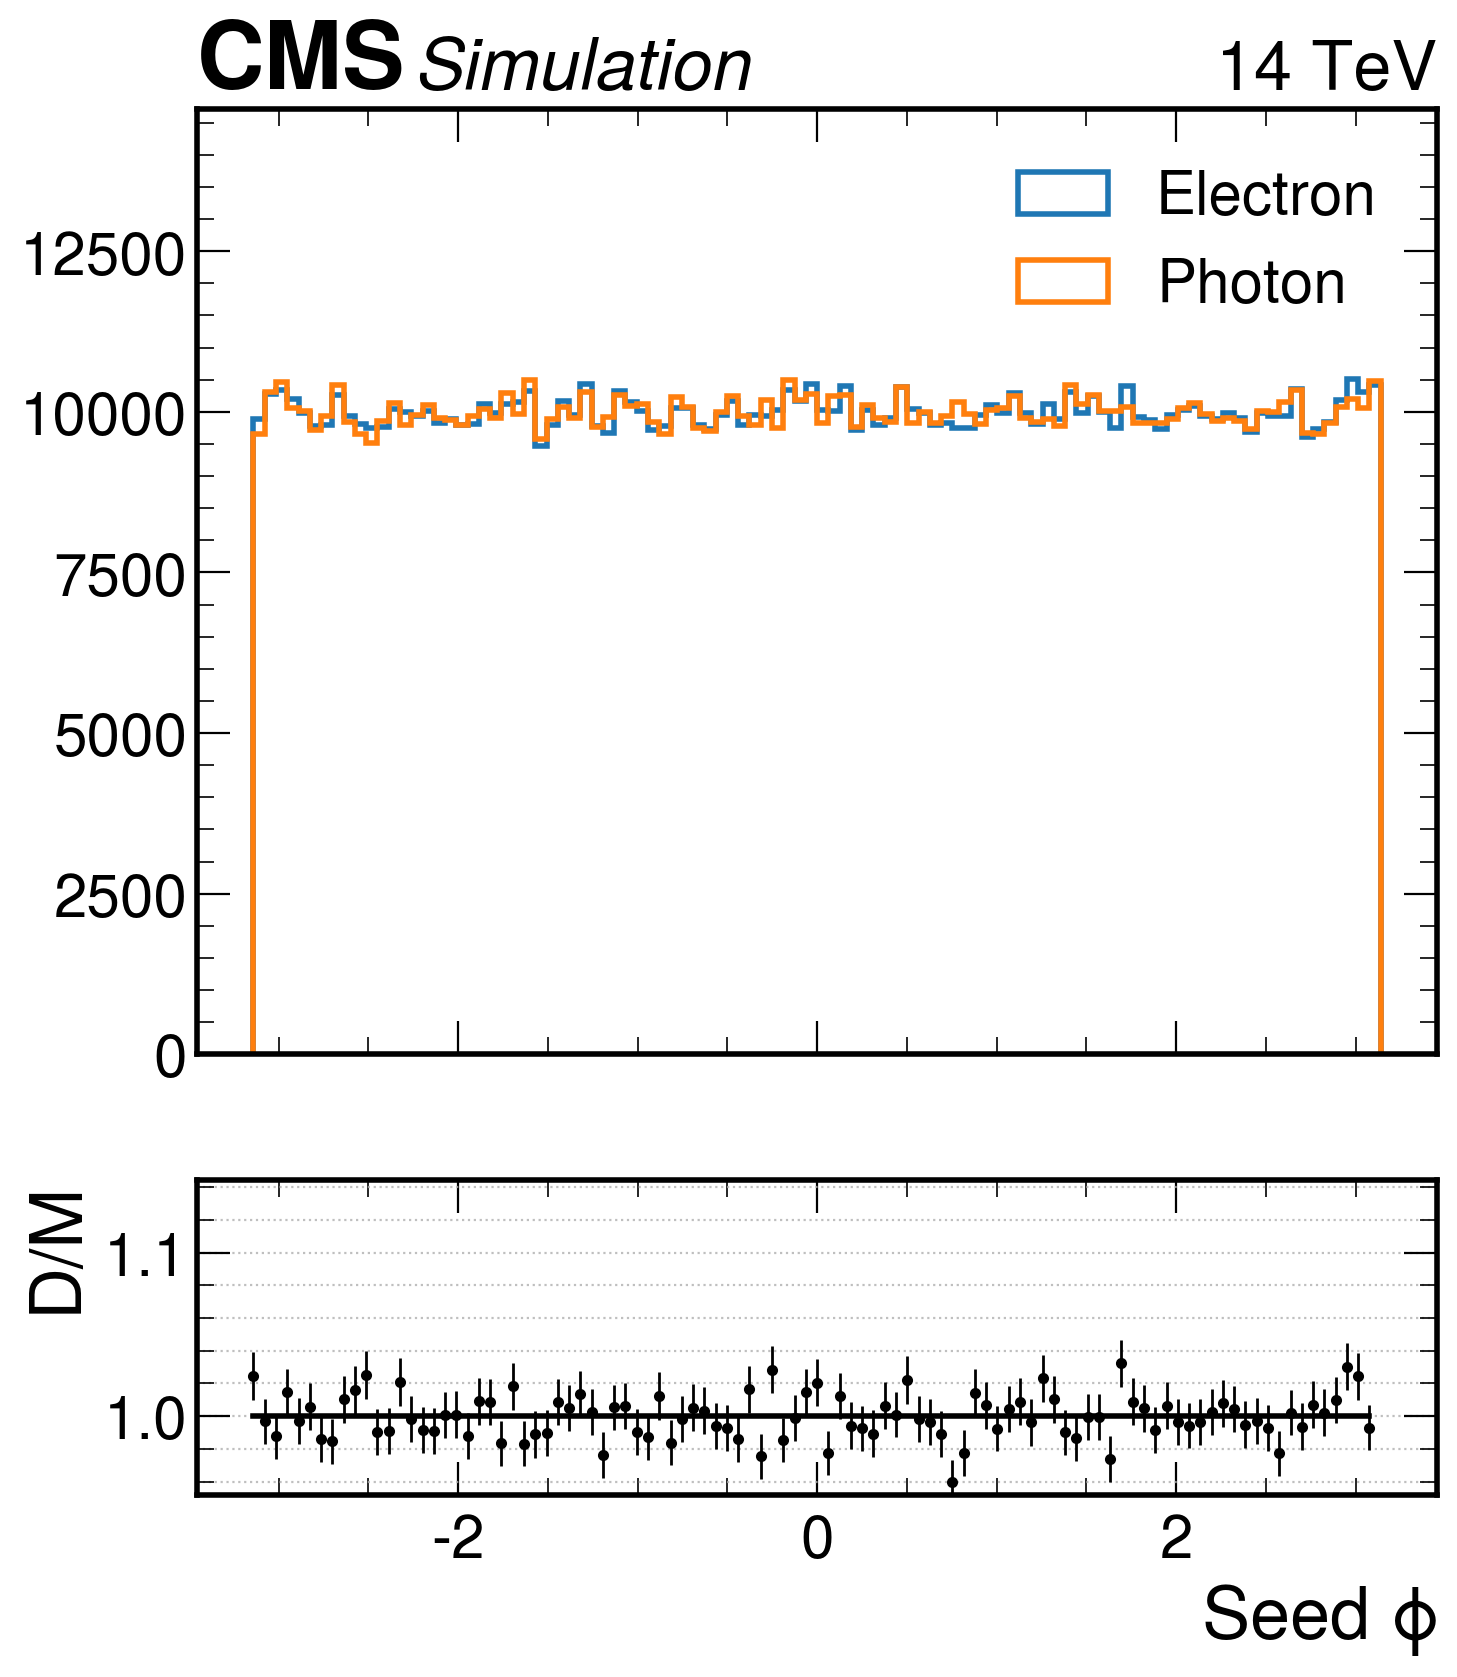

In [206]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="seed_phi", label="Seed $\phi$", bins=100, xrange=(-3.14, 3.14),
                output_folder="./plots_check_input")

/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: divide by zero encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: invalid value encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: divide by zero encountered in divide
  deltaM = np.max(np.abs((A/B)-1))
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: invalid value encountered in divide
  deltaM = np.max(np.abs((A/B)-1))


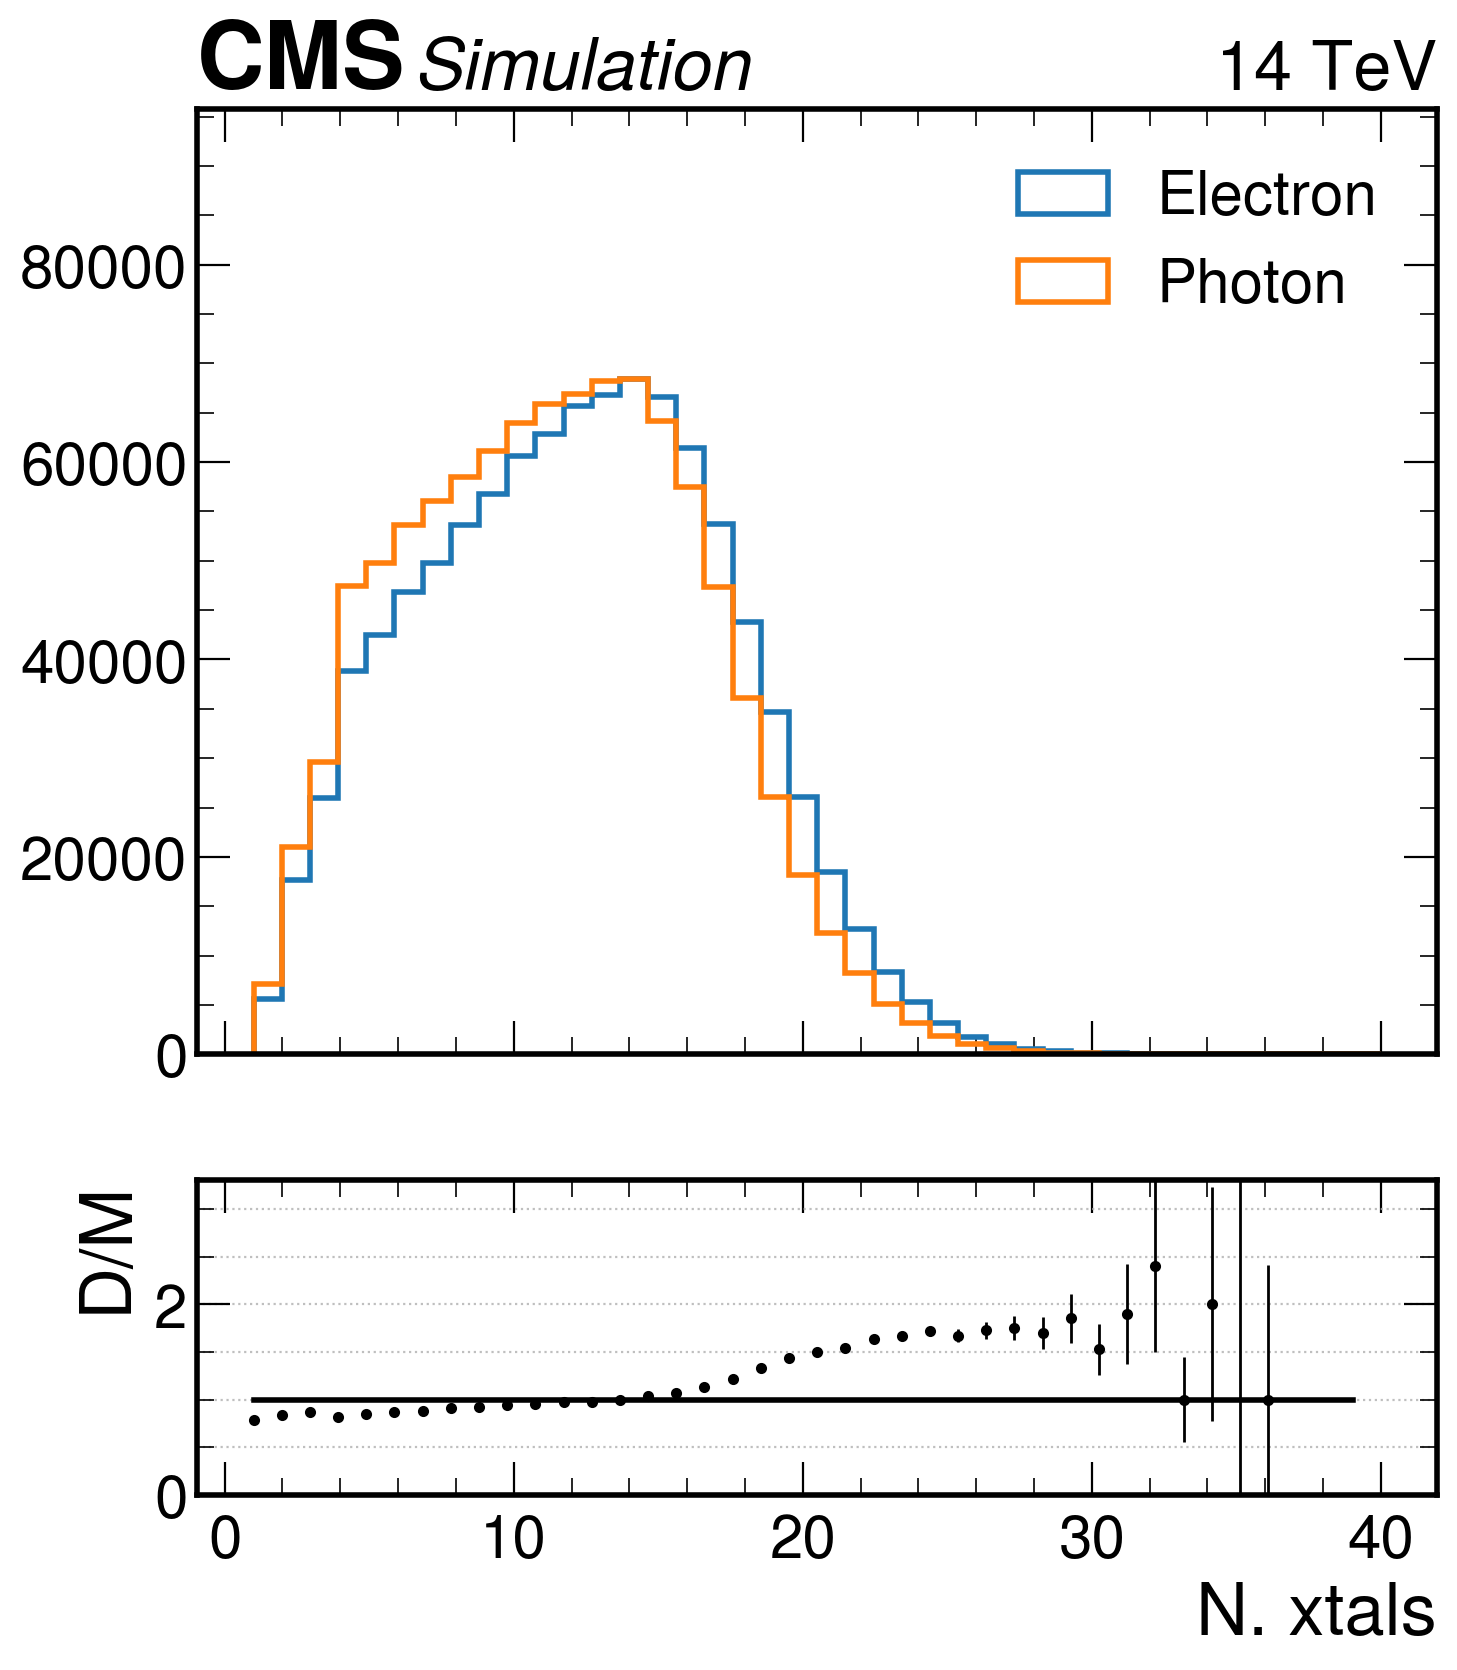

In [207]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="seed_nxtals", label="N. xtals", bins=40, xrange=(1, 40),
                output_folder="./plots_check_input")

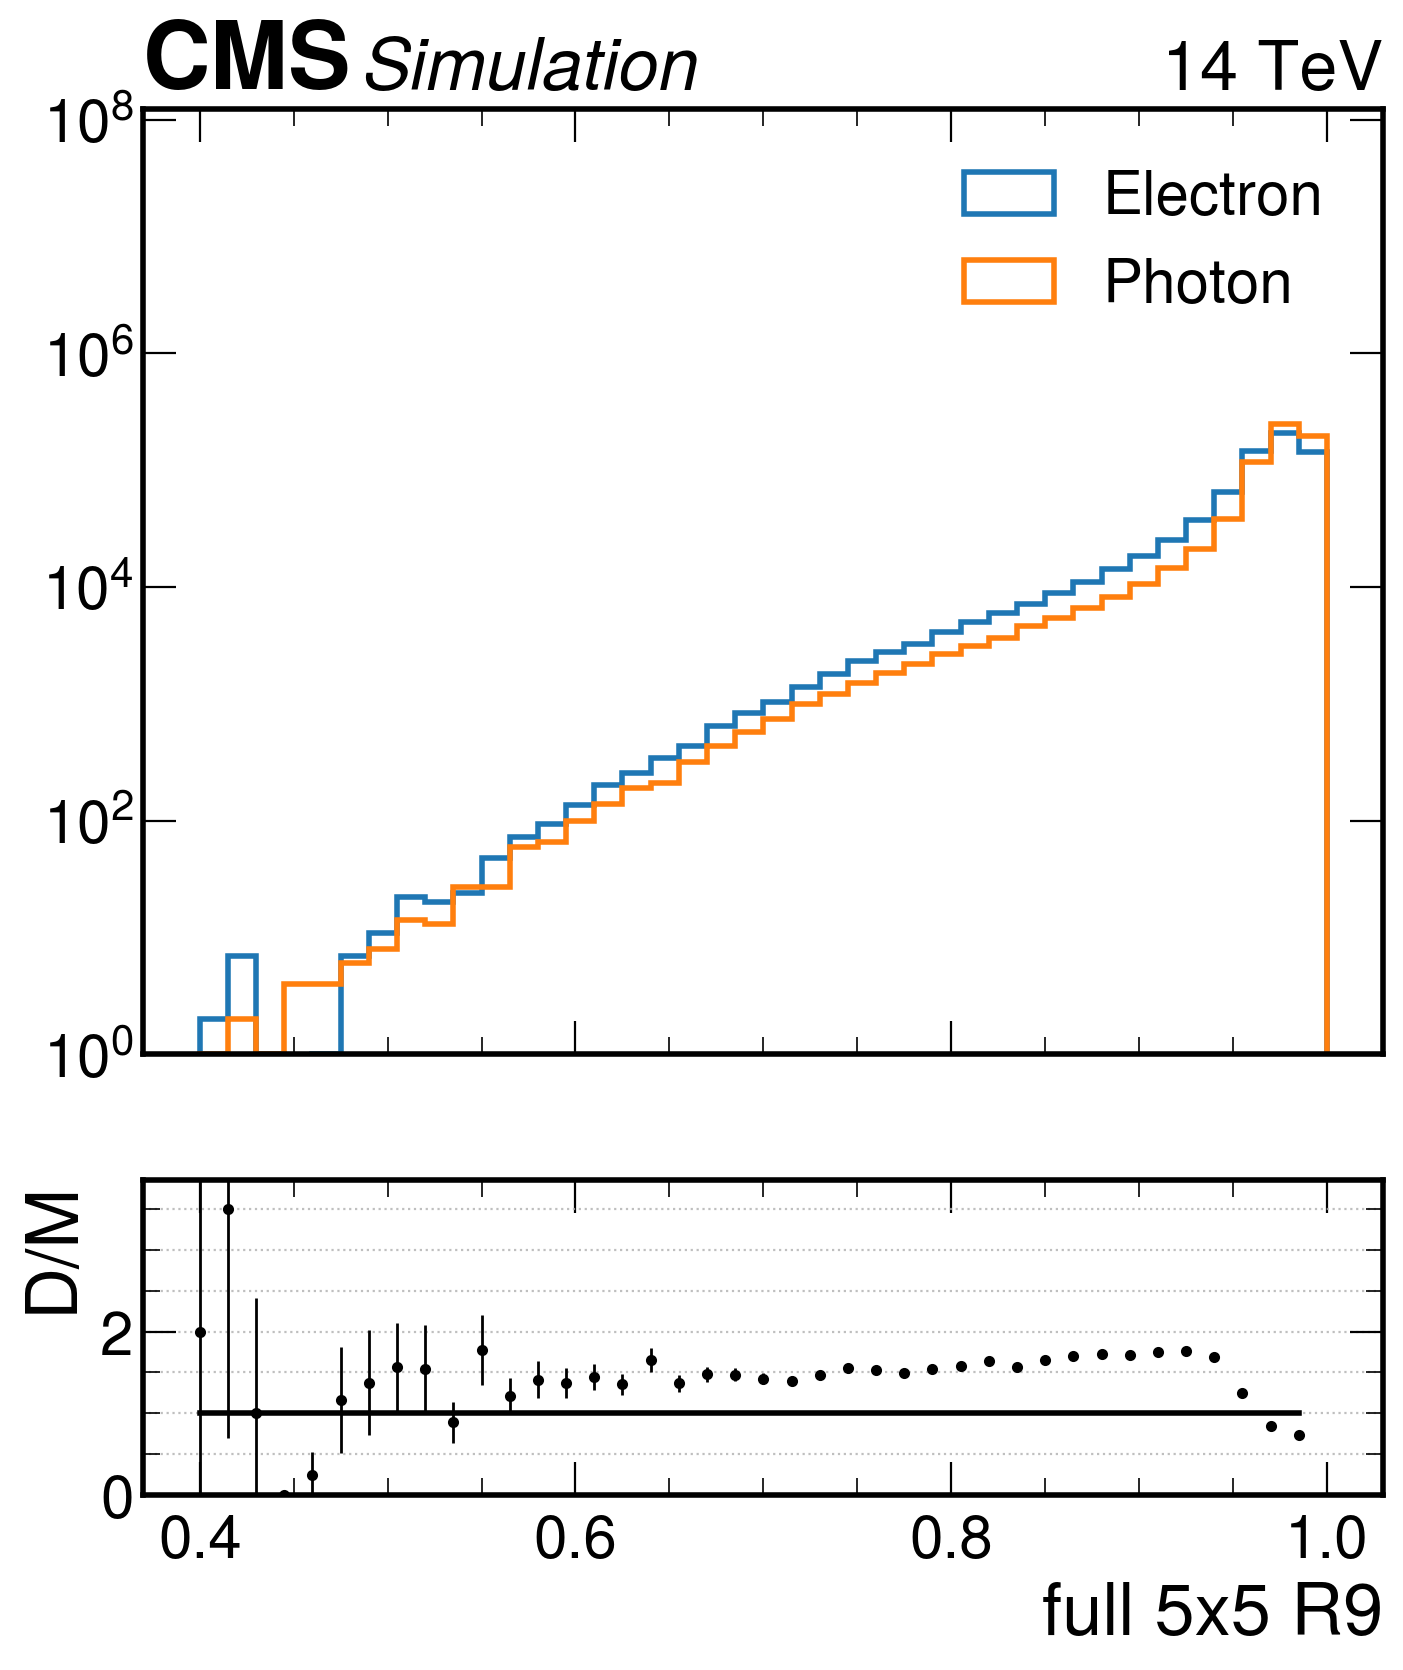

In [208]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="seed_f5_r9", label="full 5x5 R9", bins=40, xrange=(0.4,1.), ylog=True,
                output_folder="./plots_check_input")

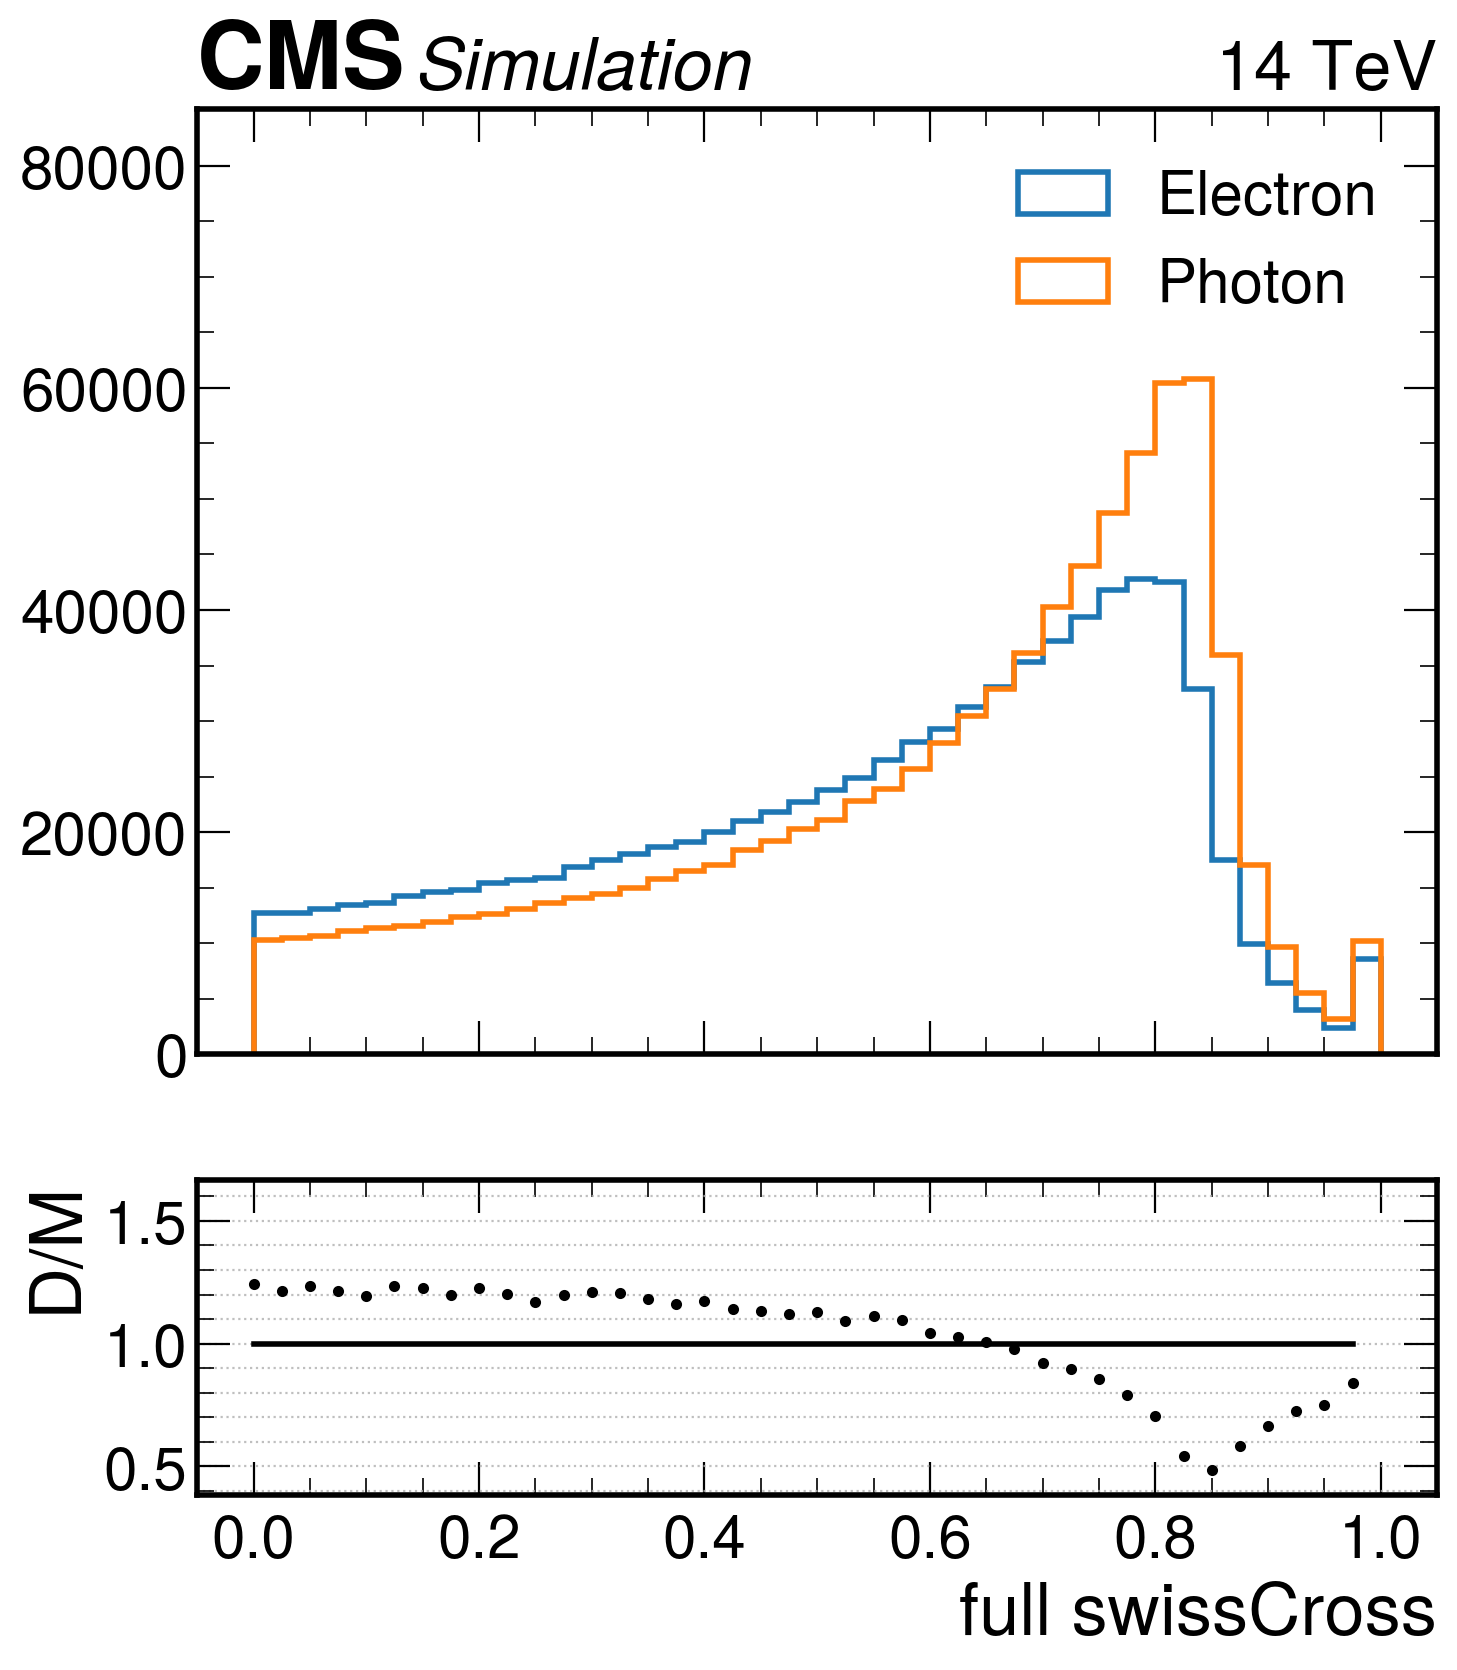

In [209]:
plot_comparison(df_ele.seed_features, df_gamma.seed_features,
                var="seed_swissCross", label="full swissCross", bins=40, xrange=(0.,1.),
                output_folder="./plots_check_input")

/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: invalid value encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: invalid value encountered in divide
  deltaM = np.max(np.abs((A/B)-1))


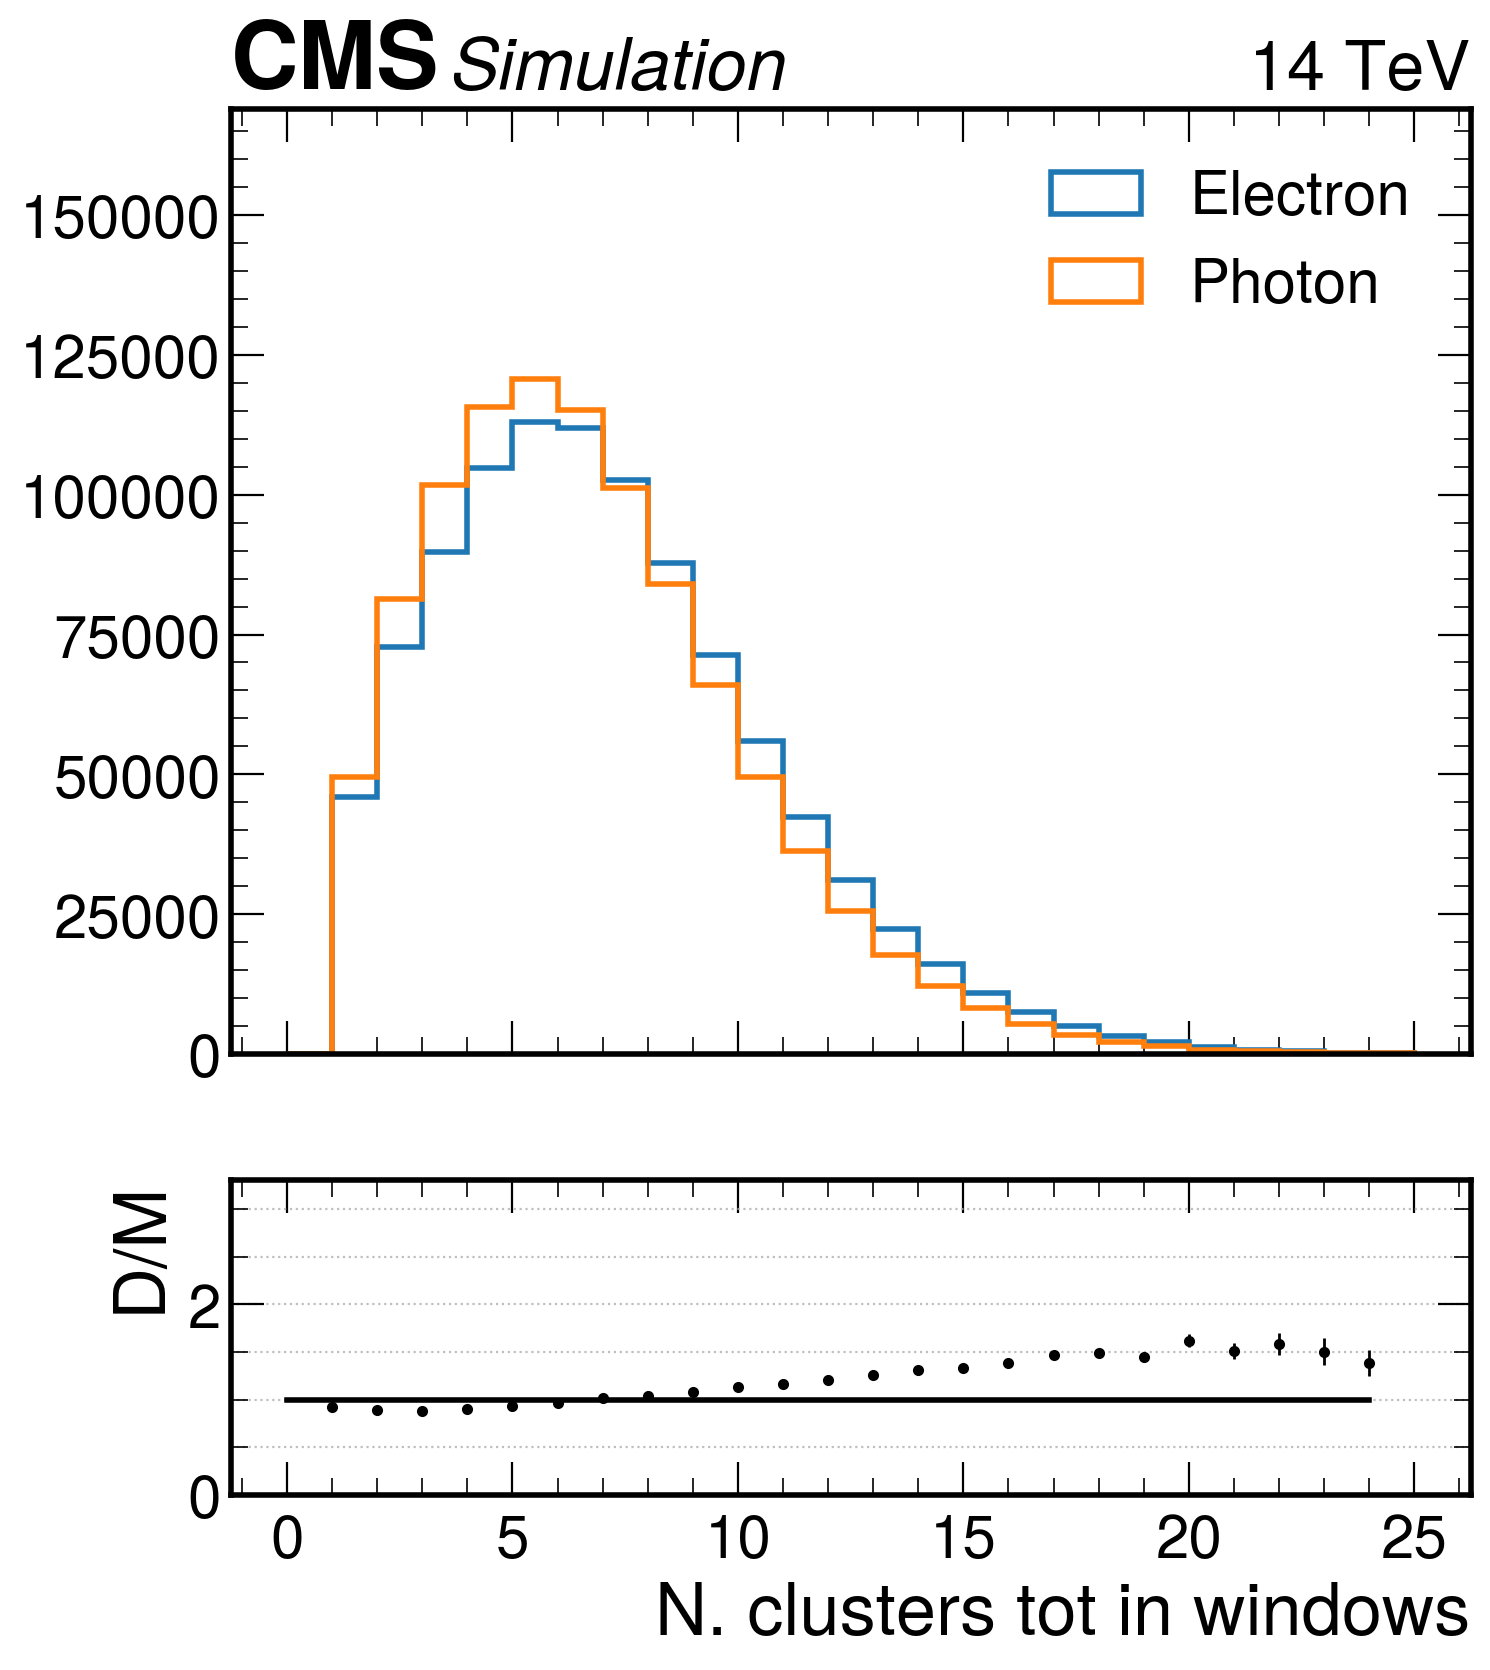

In [210]:
plot_comparison(df_ele.window_metadata, df_gamma.window_metadata,
                var="ncls", label="N. clusters tot in windows", bins=25, xrange=(0.,25),
                output_folder="./plots_check_input")

/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: invalid value encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: invalid value encountered in divide
  deltaM = np.max(np.abs((A/B)-1))


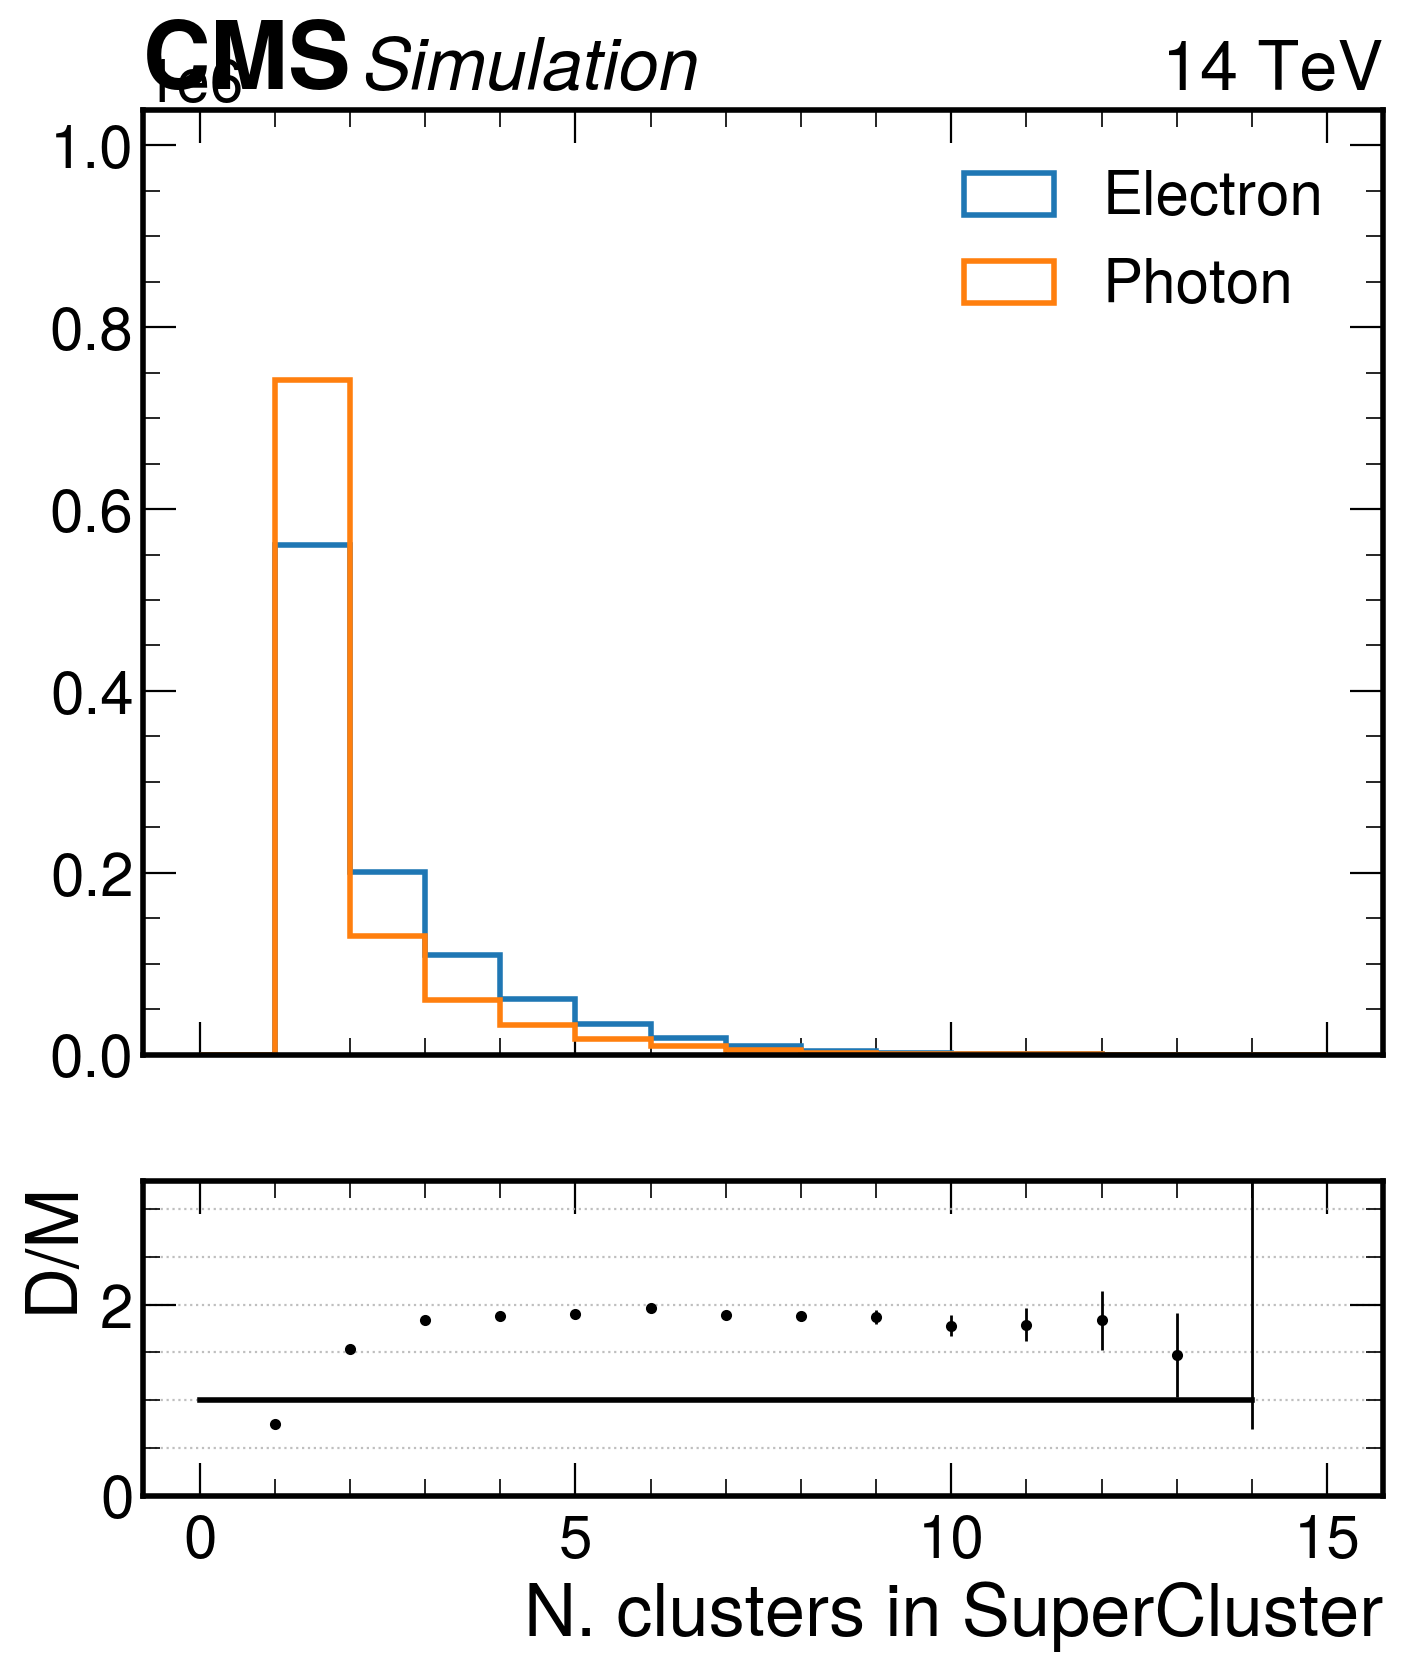

In [212]:
plot_comparison(df_ele.window_metadata, df_gamma.window_metadata,
                var="nclusters_insc", label="N. clusters in SuperCluster", bins=15, xrange=(0.,15),
                output_folder="./plots_check_input")

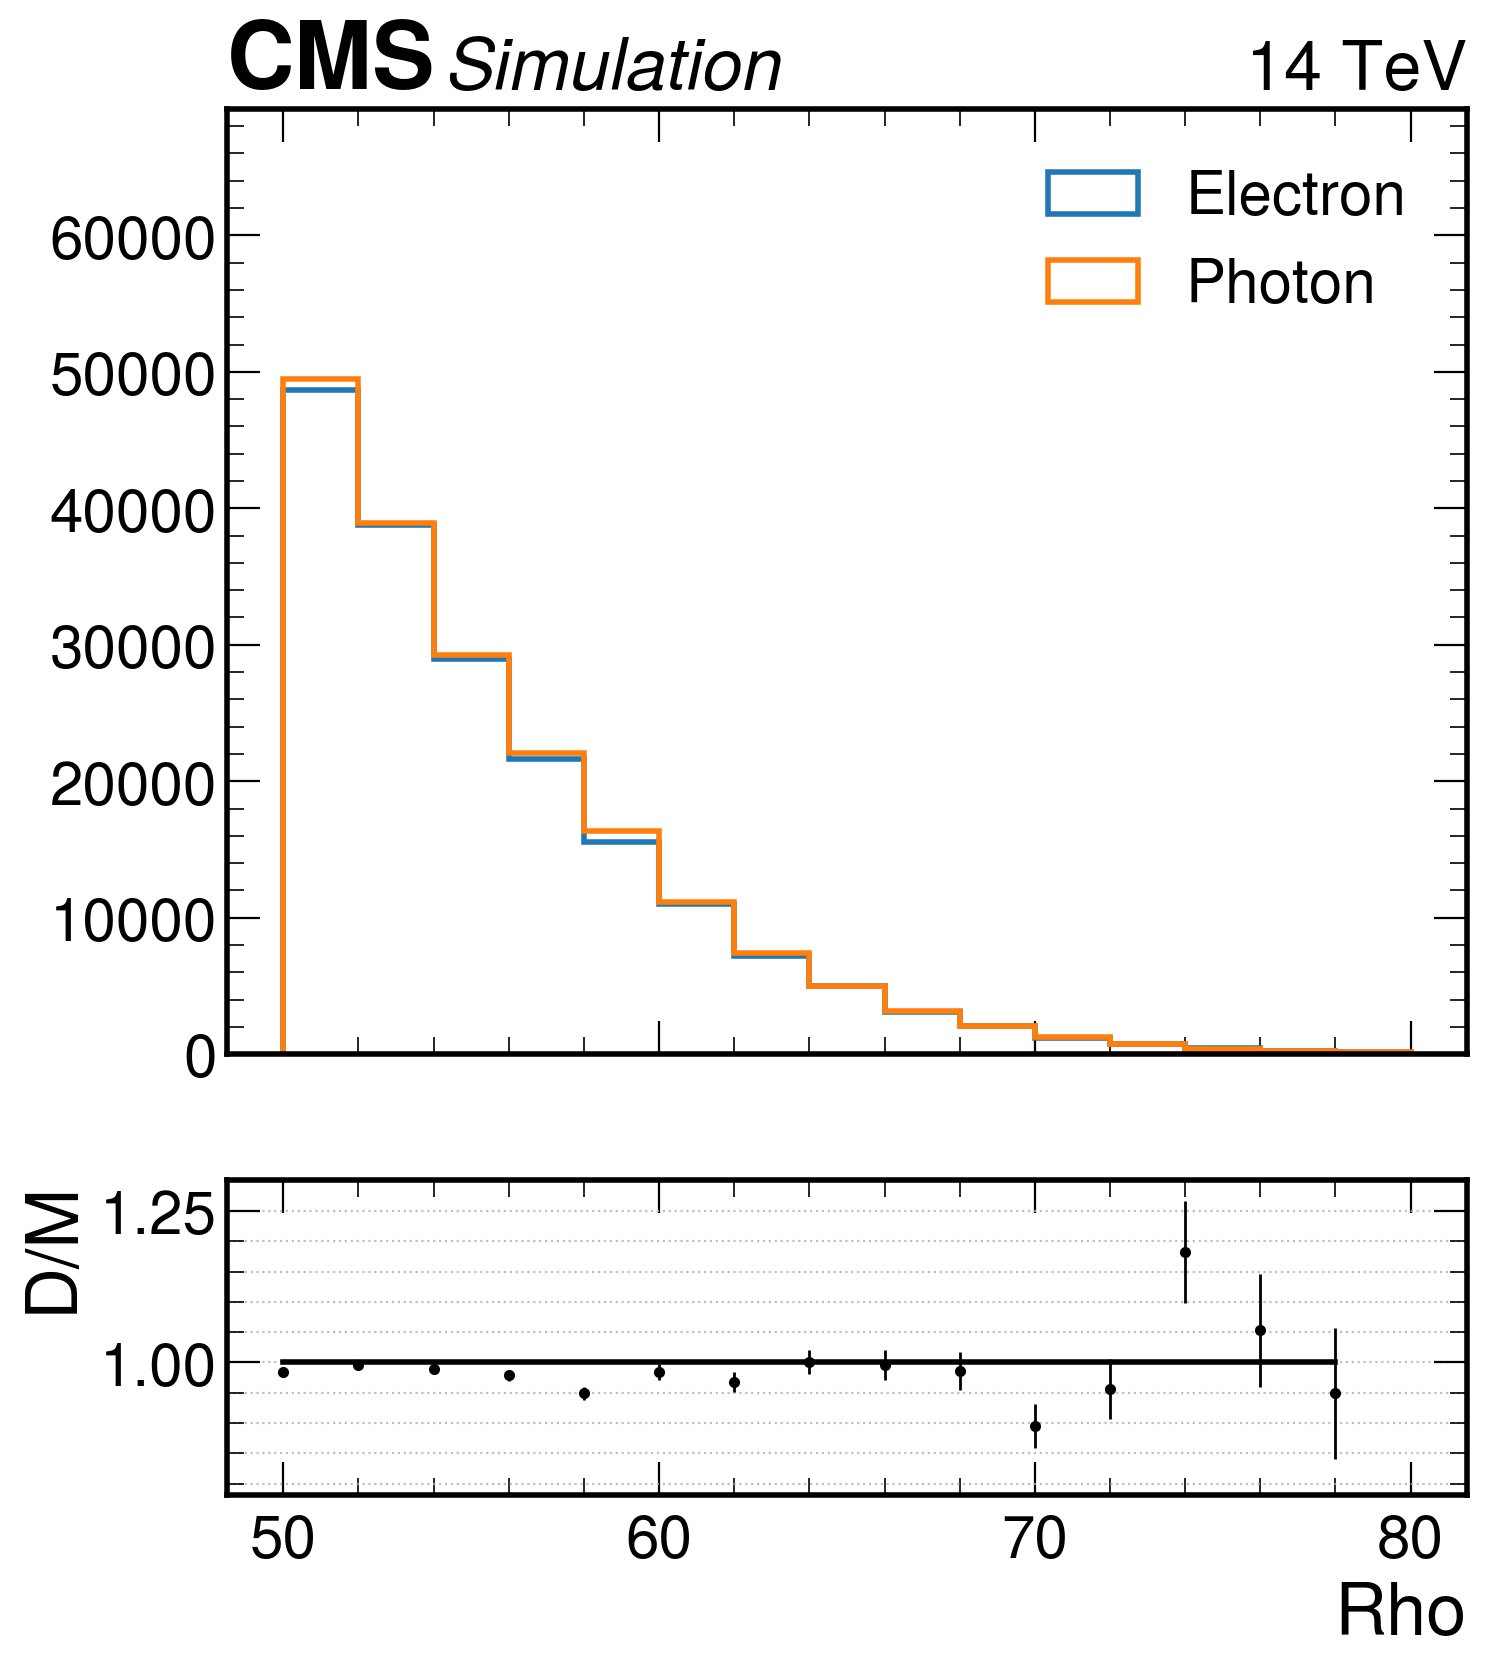

In [216]:
plot_comparison(df_ele.window_metadata, df_gamma.window_metadata,
                var="rho", label="Rho", bins=15, xrange=(50.,80),
                output_folder="./plots_check_input")

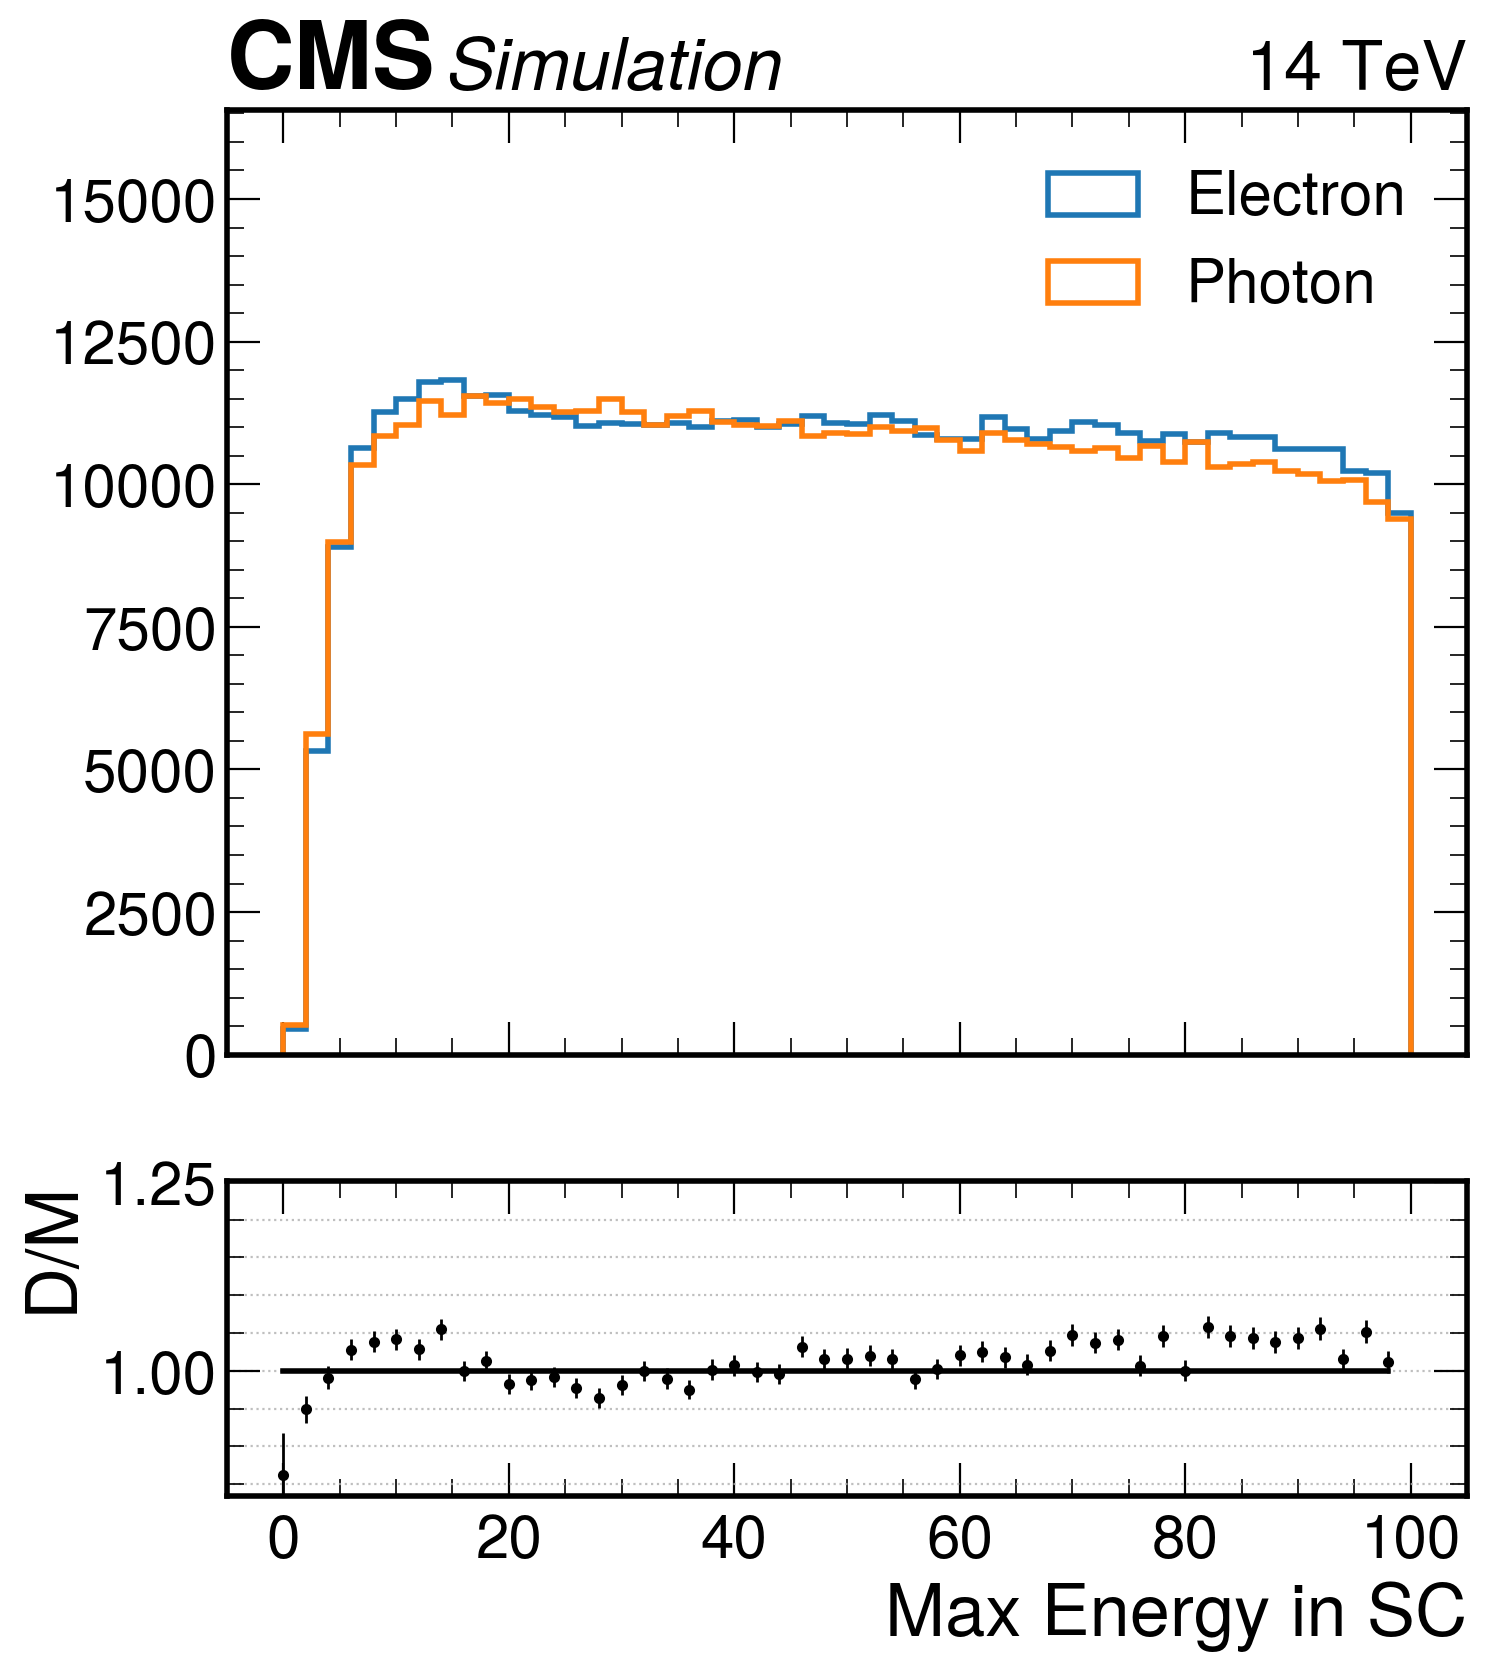

In [218]:
plot_comparison(df_ele.window_metadata, df_gamma.window_metadata,
                var="max_en_cluster_insc", label="Max Energy in SC", bins=50, xrange=(0., 100.),
                output_folder="./plots_check_input")

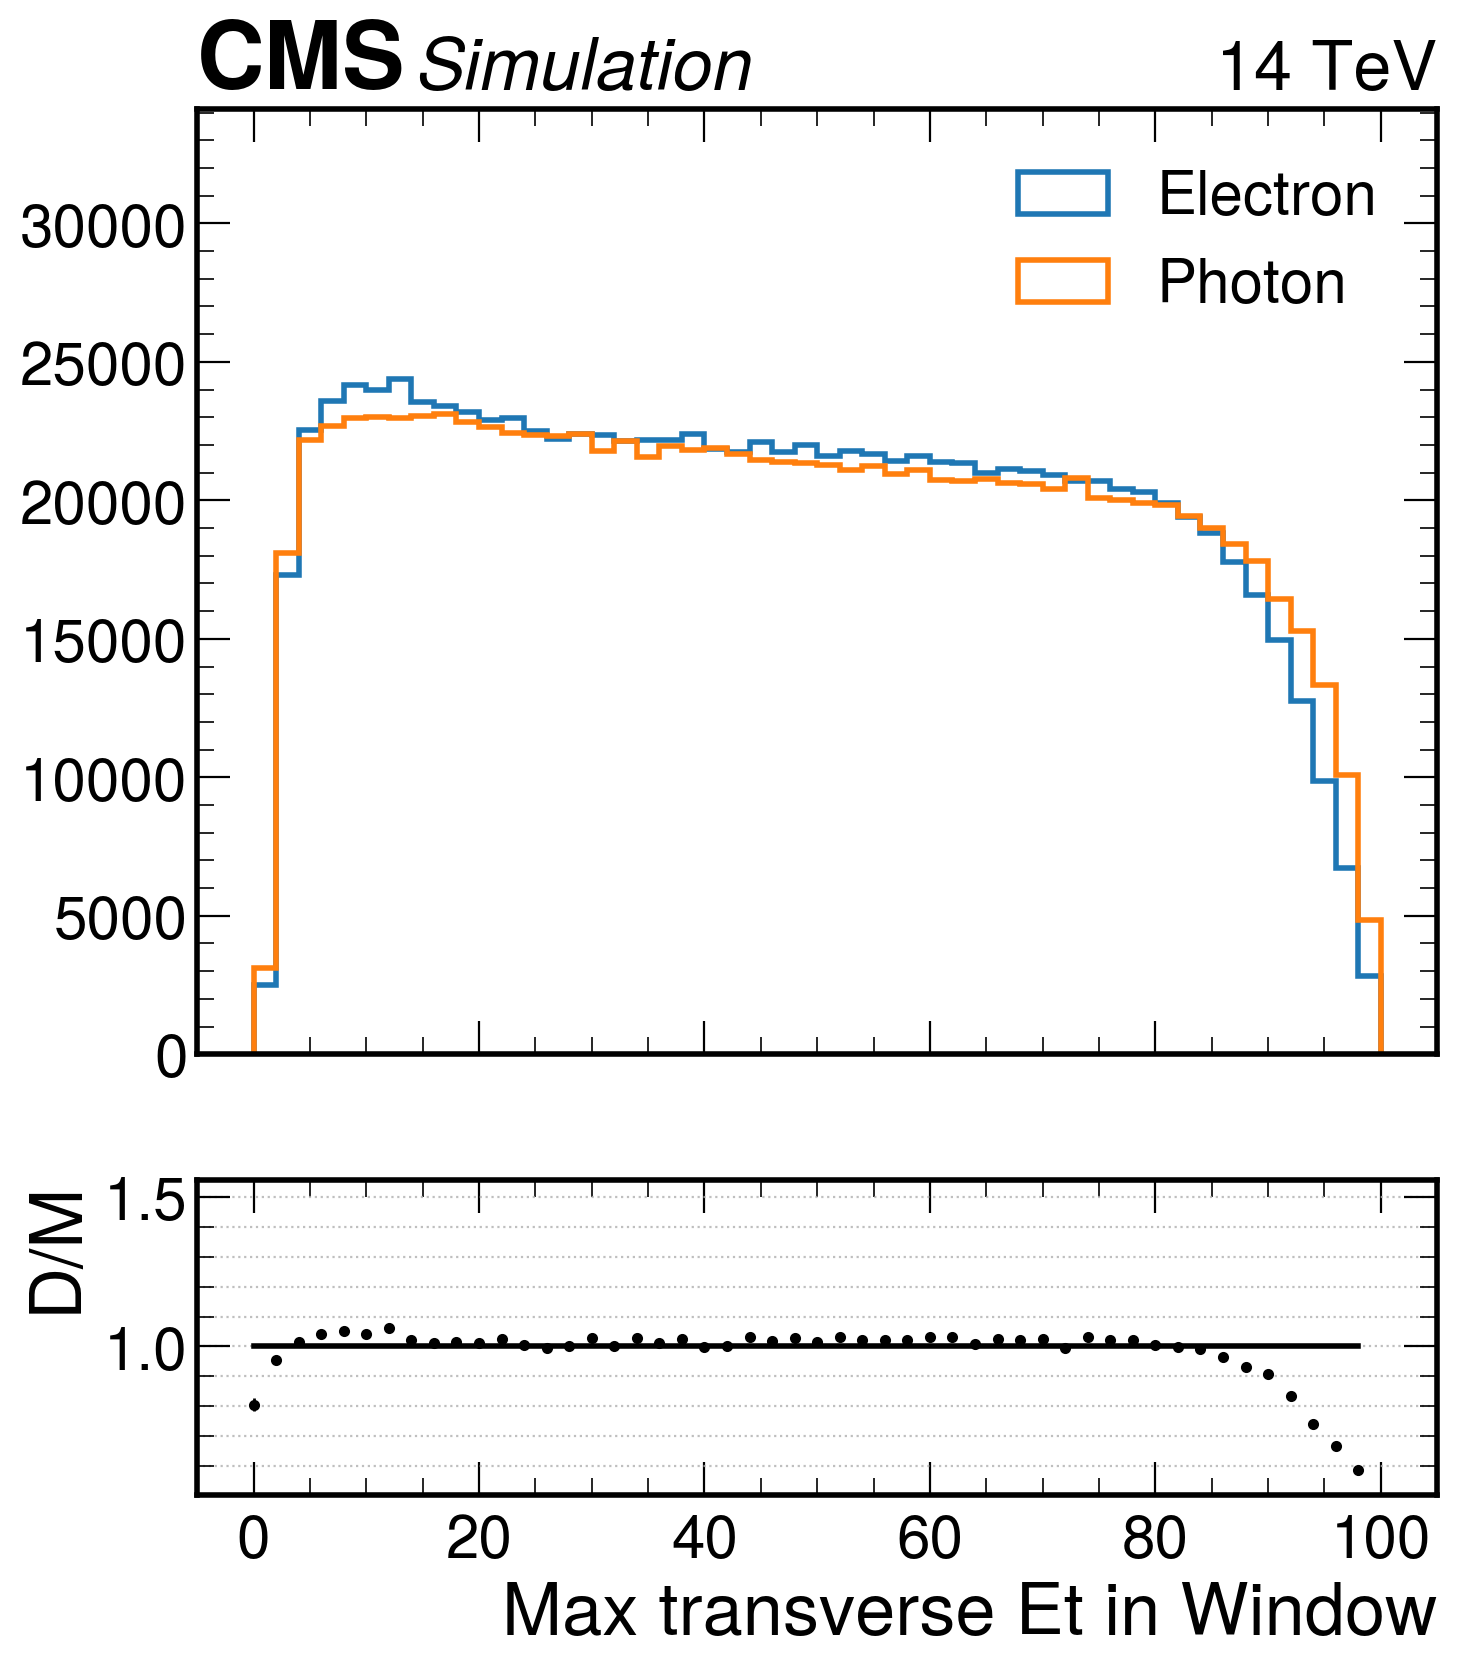

In [224]:
plot_comparison(df_ele.window_features, df_gamma.window_features,
                var="max_et_cluster", label="Max transverse Et in Window", bins=50, xrange=(0., 100.),
                output_folder="./plots_check_input")

/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: invalid value encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: invalid value encountered in divide
  deltaM = np.max(np.abs((A/B)-1))


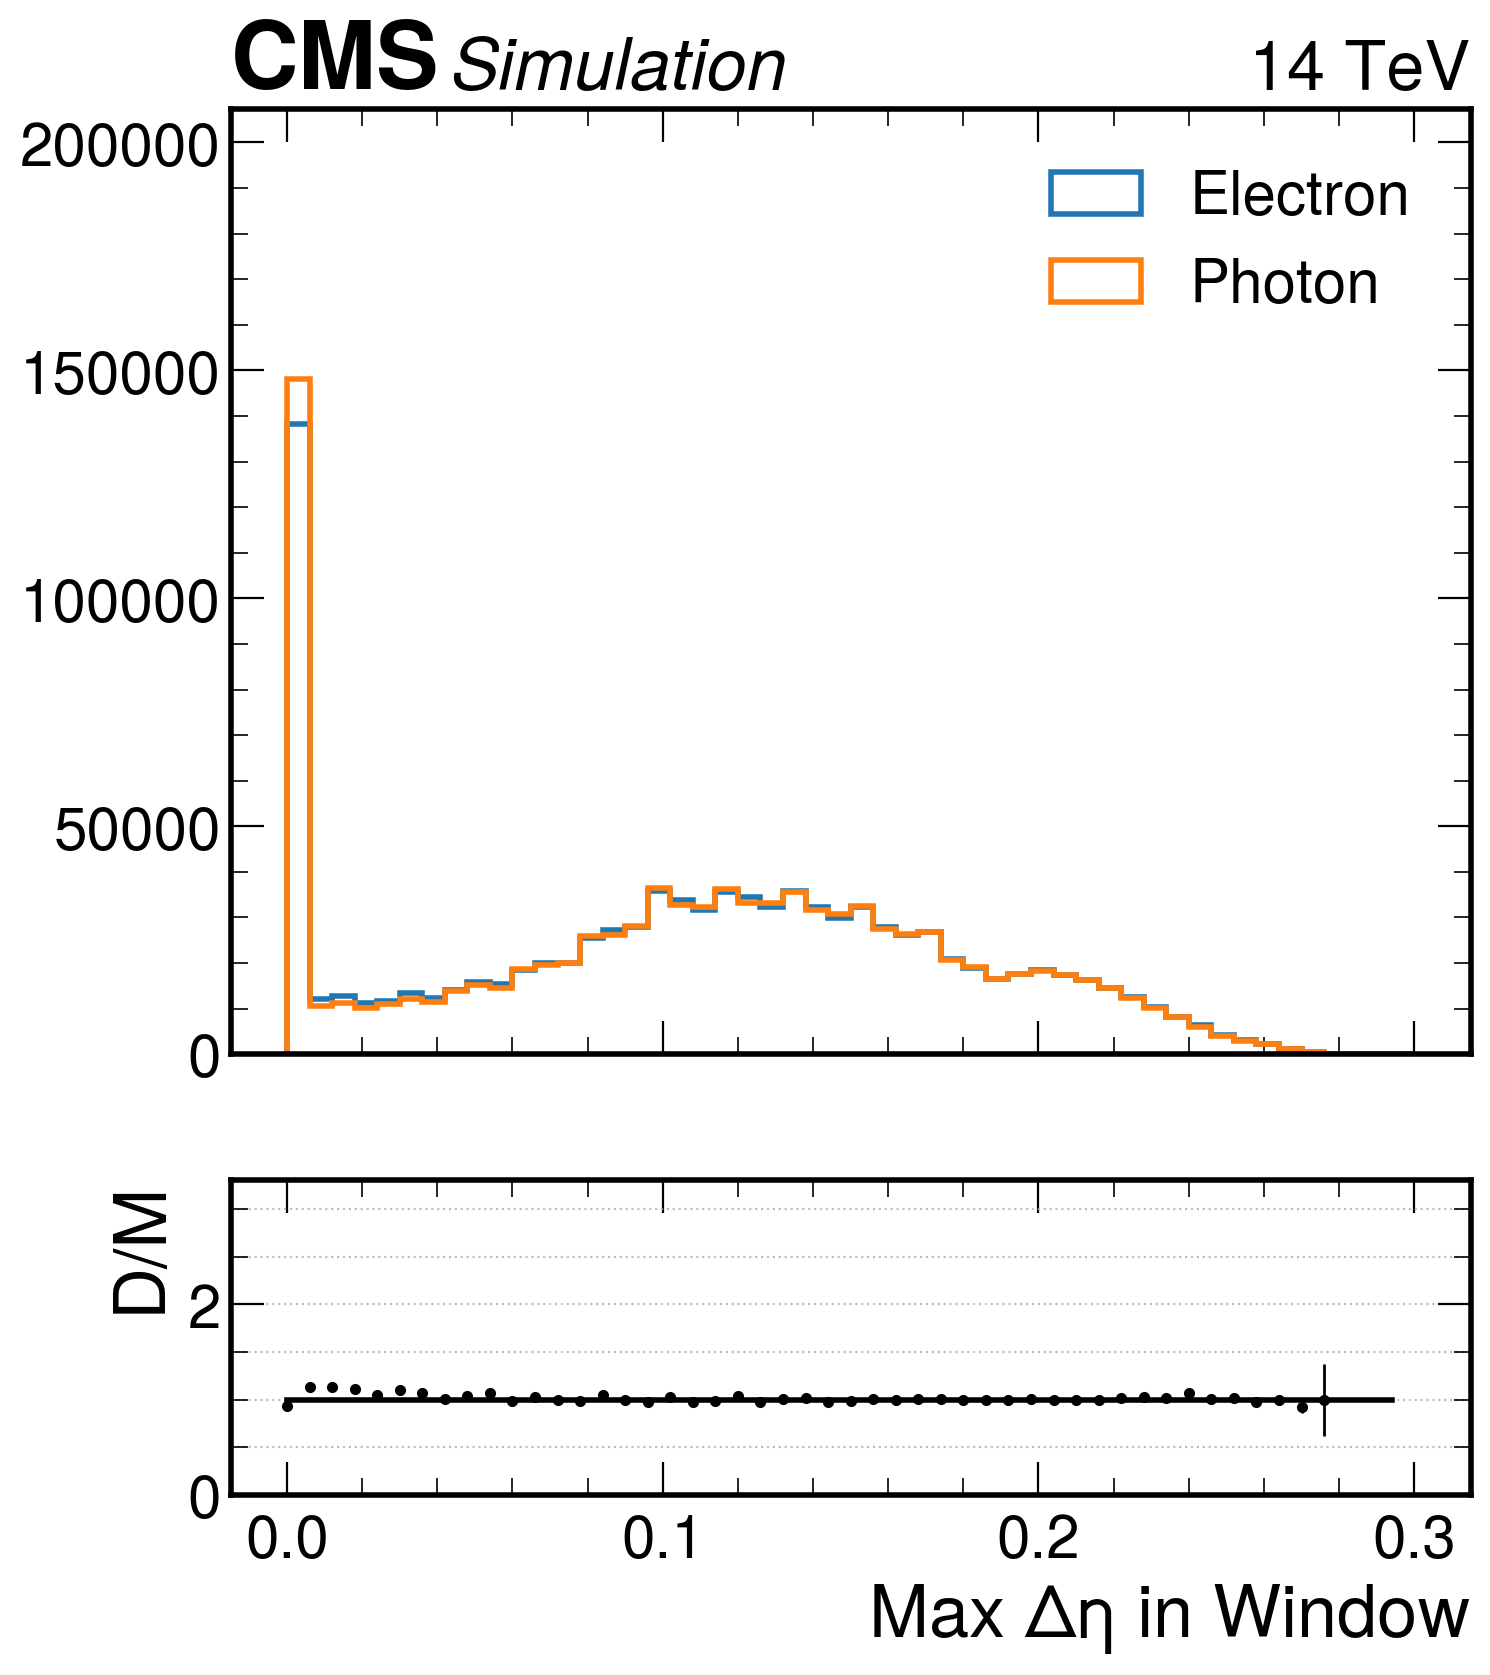

In [228]:
plot_comparison(df_ele.window_features, df_gamma.window_features,
                var="max_deta_cluster", label="Max $\Delta \eta$ in Window", bins=50, xrange=(0.,0.3),
                output_folder="./plots_check_input")

/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: divide by zero encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in multiply
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:28: RuntimeWarning: invalid value encountered in divide
  errR = np.sqrt( errA**2 * (1/B)**2 + errB**2 *(A/B**2)**2)
/tmp/ipykernel_46452/4126186237.py:30: RuntimeWarning: invalid value encountered in divide
  axr.errorbar(binX[:-1], A/B, xerr=0, yerr=errR,
/tmp/ipykernel_46452/4126186237.py:33: RuntimeWarning: invalid value encountered in divide
  deltaM = np.max(np.abs((A/B)-1))


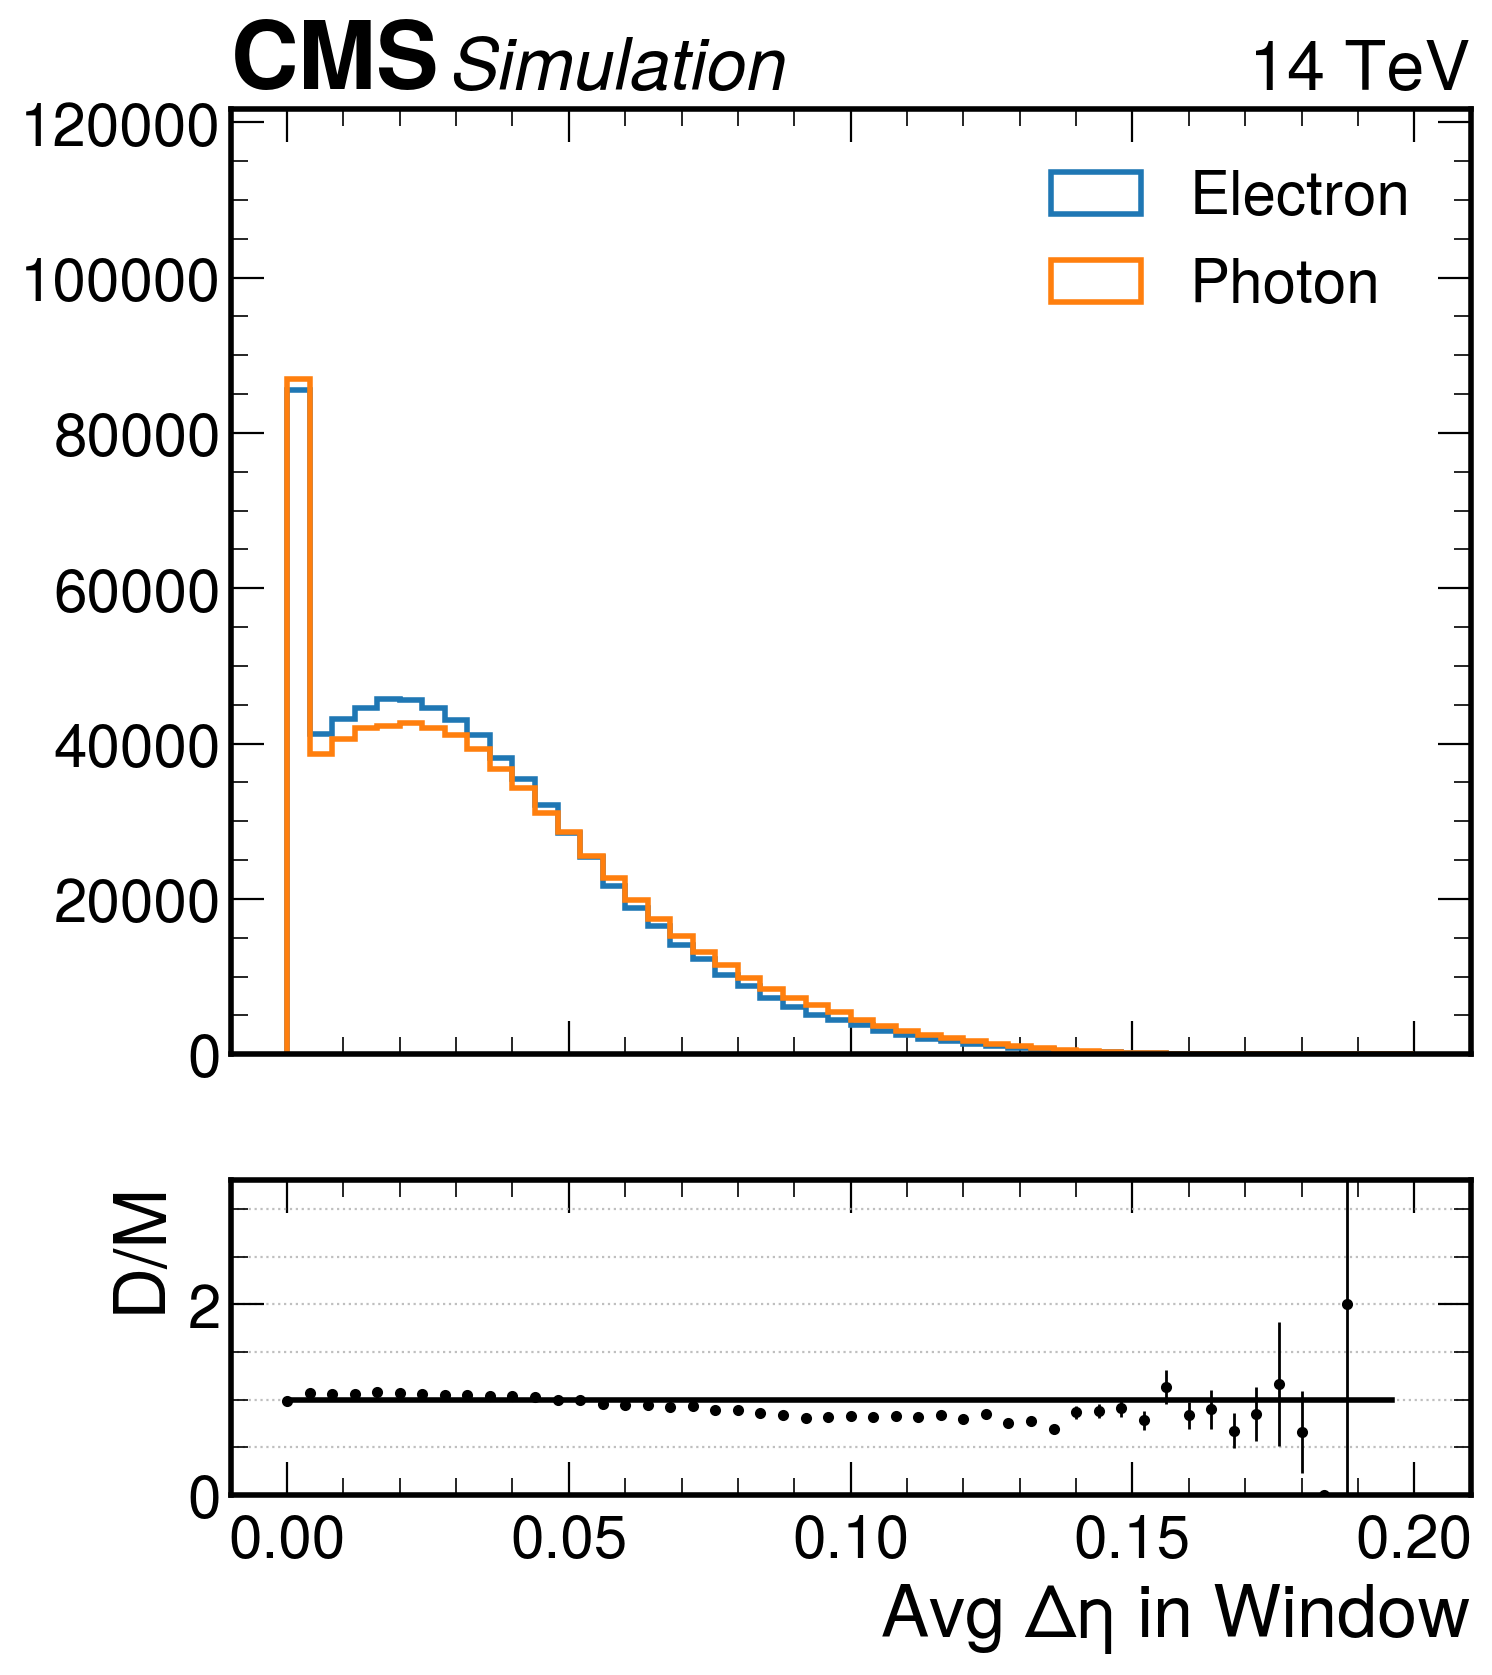

In [230]:
plot_comparison(df_ele.window_features, df_gamma.window_features,
                var="mean_deta_cluster", label="Avg $\Delta \eta$ in Window", bins=50, xrange=(0.,0.2),
                output_folder="./plots_check_input")

In [219]:
df_ele.window_features.afields

['max_en_cluster',
 'max_et_cluster',
 'max_deta_cluster',
 'max_dphi_cluster',
 'max_den_cluster',
 'max_det_cluster',
 'min_en_cluster',
 'min_et_cluster',
 'min_deta_cluster',
 'min_dphi_cluster',
 'min_den_cluster',
 'min_det_cluster',
 'mean_en_cluster',
 'mean_et_cluster',
 'mean_deta_cluster',
 'mean_dphi_cluster',
 'mean_den_cluster',
 'mean_det_cluster']

## Reweighting of electron and photons

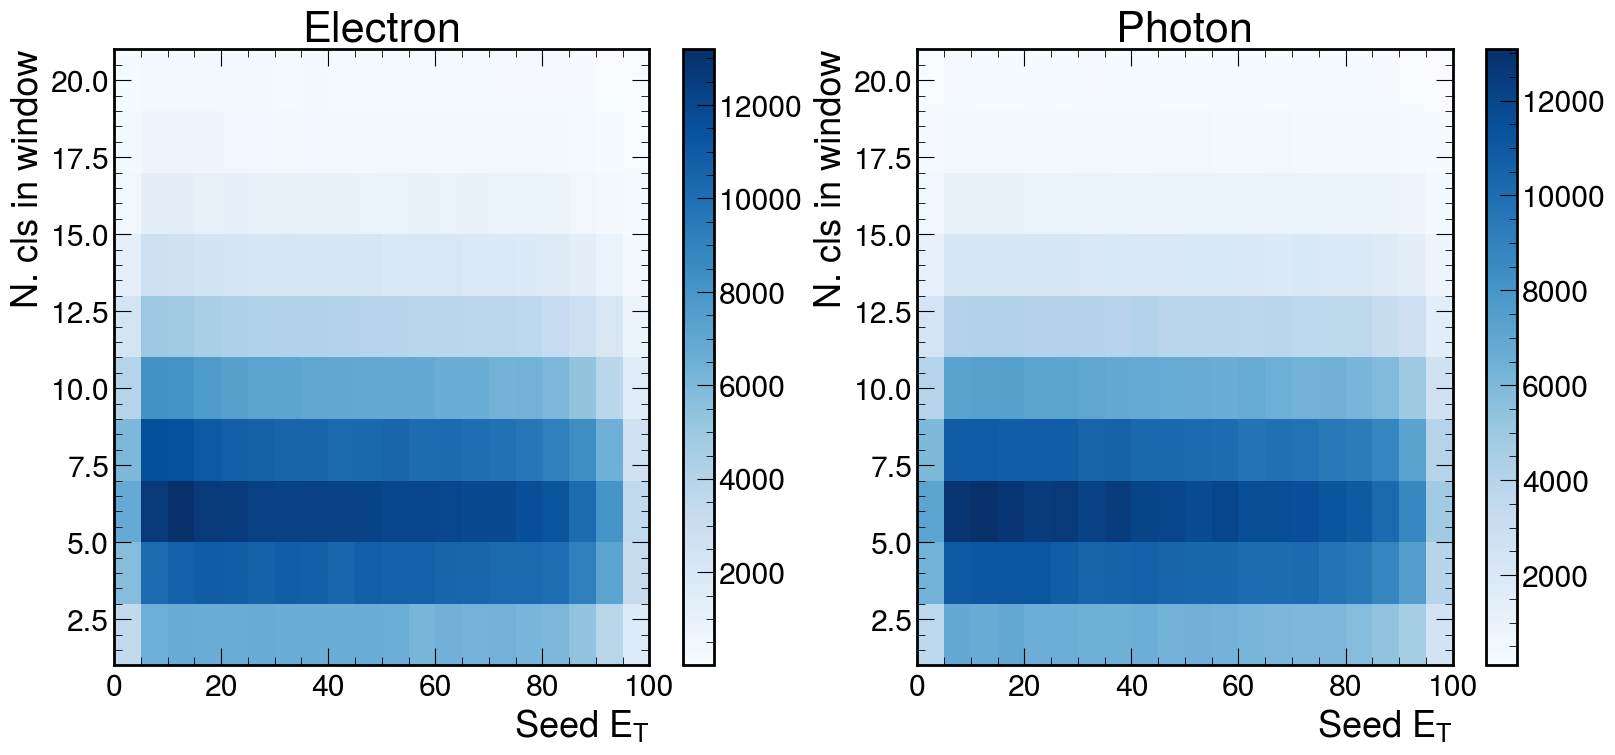

In [258]:
f, (ax,ay) = plt.subplots(1,2,figsize=(19,8), dpi=100)
c, h, b , I =  ax.hist2d(ak.to_numpy(df_ele.seed_features.et_seed),ak.to_numpy(df_ele.window_metadata.ncls), 
          range=((0., 100.),(1,21)), bins=(20, 10))
ax.set_xlabel("Seed $E_T$")
ax.set_ylabel("N. cls in window")
ax.set_title("Electron")
plt.colorbar(I, ax=ax)

c, h, b , I =  ay.hist2d(ak.to_numpy(df_gamma.seed_features.et_seed),ak.to_numpy(df_ele.window_metadata.ncls),  
          range=((0., 100.),(1,21)), bins=(20, 10))
ay.set_xlabel("Seed $E_T$")
ay.set_ylabel("N. cls in window")
ay.set_title("Photon")
plt.colorbar(I, ax=ay)

f.savefig(output_folder + f"/seed_et_ncsltot_comparison.png")
f.savefig(output_folder + f"/seed_et_ncsltot_comparison.pdf")
f.savefig(output_folder + f"/seed_et_ncsltot_comparison.svg")

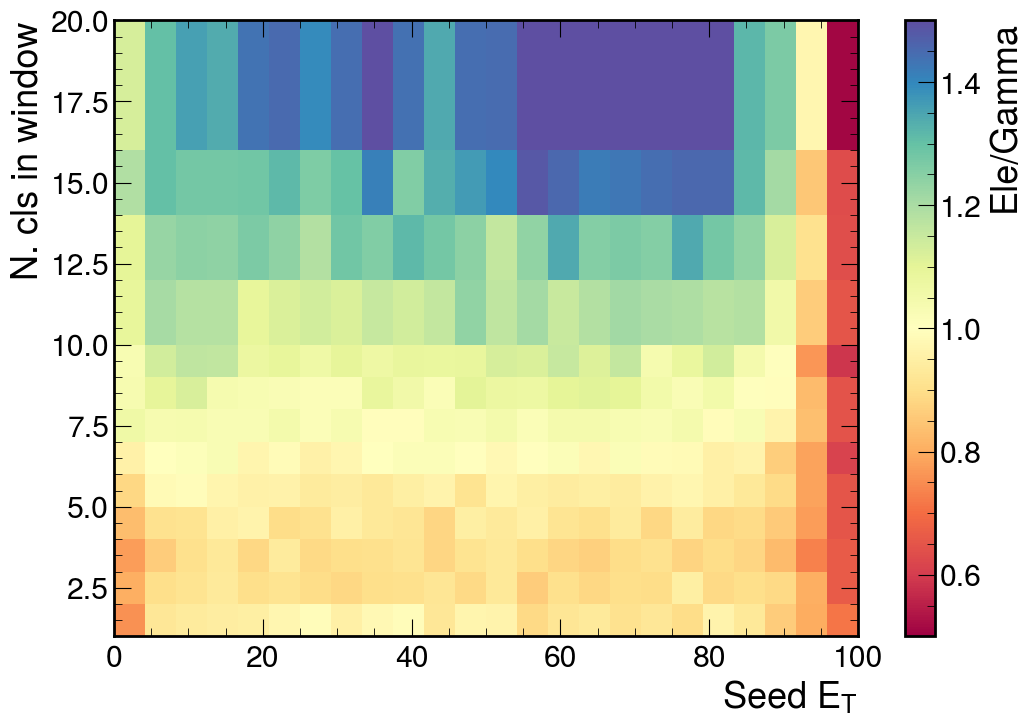

In [269]:
bins_et = np.linspace(0., 100., 25)
bins_ncls = [1,2,3,4,5,6,7,8,9,10,12,14,16,20]

f, ax, = plt.subplots(1,figsize=(12,8), dpi=100)
c_ele, bx, by  = np.histogram2d(ak.to_numpy(df_ele.seed_features.et_seed),
                                ak.to_numpy(df_ele.window_metadata.ncls), 
                                  bins=[bins_et, bins_ncls])
c_gamma, bx, by  = np.histogram2d(ak.to_numpy(df_gamma.seed_features.et_seed),
                                  ak.to_numpy(df_gamma.window_metadata.ncls), 
                                   bins=[bins_et, bins_ncls])

r = c_ele / c_gamma

mesh = ax.pcolormesh(bx, by, r.T, cmap="Spectral", vmin=0.5, vmax=1.5)

ax.set_xlabel("Seed $E_T$")
ax.set_ylabel("N. cls in window")
plt.colorbar(mesh,ax=ax, label="Ele/Gamma")


f.savefig(output_folder + f"/seed_et_ncsltot_comparison_ratio.png")
f.savefig(output_folder + f"/seed_et_ncsltot_comparison_ratio.pdf")
f.savefig(output_folder + f"/seed_et_ncsltot_comparison_ratio.svg")


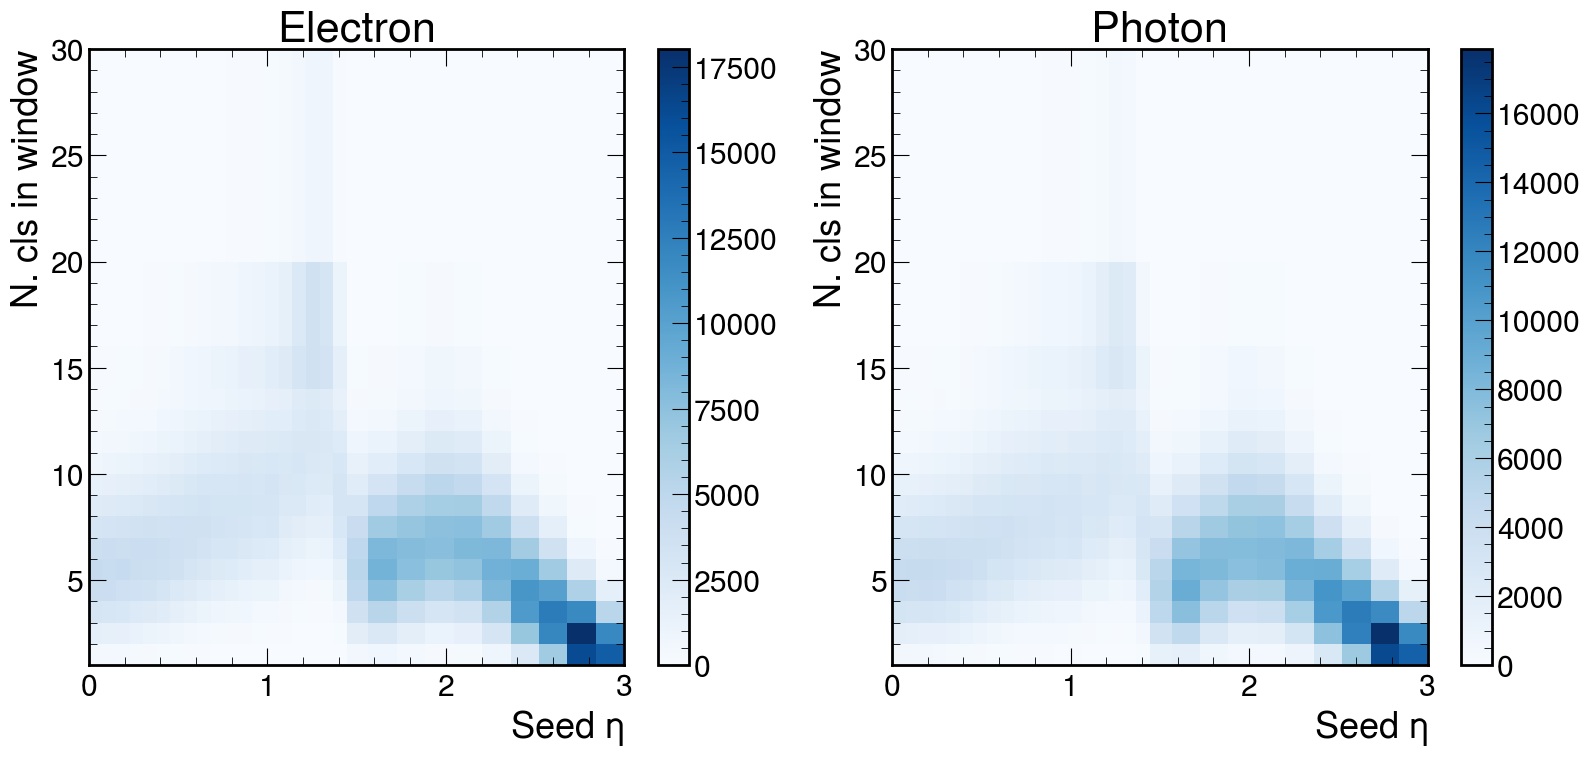

In [368]:
bins_et = np.concatenate([np.linspace(0, 1.4442,20),  np.linspace(1.566, 3, 10)])
bins_ncls = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,20,30]


f, (ax,ay) = plt.subplots(1,2,figsize=(19,8), dpi=100)
c, h, b , I =  ax.hist2d(ak.to_numpy(abs(df_ele.seed_features.seed_eta)),ak.to_numpy(df_ele.window_metadata.ncls), 
          bins=[bins_et, bins_ncls])
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. cls in window")
ax.set_title("Electron")
plt.colorbar(I, ax=ax)

c, h, b , I =  ay.hist2d(ak.to_numpy(abs(df_gamma.seed_features.seed_eta)),ak.to_numpy(df_gamma.window_metadata.ncls),  
           bins=[bins_et, bins_ncls])
ay.set_xlabel("Seed $\eta$")
ay.set_ylabel("N. cls in window")
ay.set_title("Photon")
plt.colorbar(I, ax=ay)

f.savefig(output_folder + f"/seed_eta_ncsltot_comparison.png")
f.savefig(output_folder + f"/seed_eta_ncsltot_comparison.pdf")
f.savefig(output_folder + f"/seed_eta_ncsltot_comparison.svg")

/tmp/ipykernel_46452/275615509.py:19: RuntimeWarning: divide by zero encountered in divide
  w_num/w_denom,
/tmp/ipykernel_46452/275615509.py:19: RuntimeWarning: invalid value encountered in divide
  w_num/w_denom,
/tmp/ipykernel_46452/275615509.py:22: RuntimeWarning: divide by zero encountered in divide
  np.sqrt((1/w_denom)**2 * num_var + (w_num/w_denom**2)**2 * denom_var),
/tmp/ipykernel_46452/275615509.py:22: RuntimeWarning: invalid value encountered in multiply
  np.sqrt((1/w_denom)**2 * num_var + (w_num/w_denom**2)**2 * denom_var),
/tmp/ipykernel_46452/275615509.py:22: RuntimeWarning: invalid value encountered in divide
  np.sqrt((1/w_denom)**2 * num_var + (w_num/w_denom**2)**2 * denom_var),


CorrectionSet (schema v2)
Reweight of photons to electron
📂
└── 📈 photon_to_electron_weight (v0)
    Reweight of photons to electron
    Node counts: MultiBinning: 1
    ╭─────────── ▶ input ────────────╮ ╭──────────── ▶ input ────────────╮
    │ seed_eta (real)                │ │ ncls (real)                     │
    │ Seed $\eta$                    │ │ Ncls in window                  │
    │ Range: [0.0, 3.0), overflow ok │ │ Range: [1.0, 25.0), overflow ok │
    ╰────────────────────────────────╯ ╰─────────────────────────────────╯
    ╭─── ◀ output ───╮
    │ weight (real)  │
    │ No description │
    ╰────────────────╯

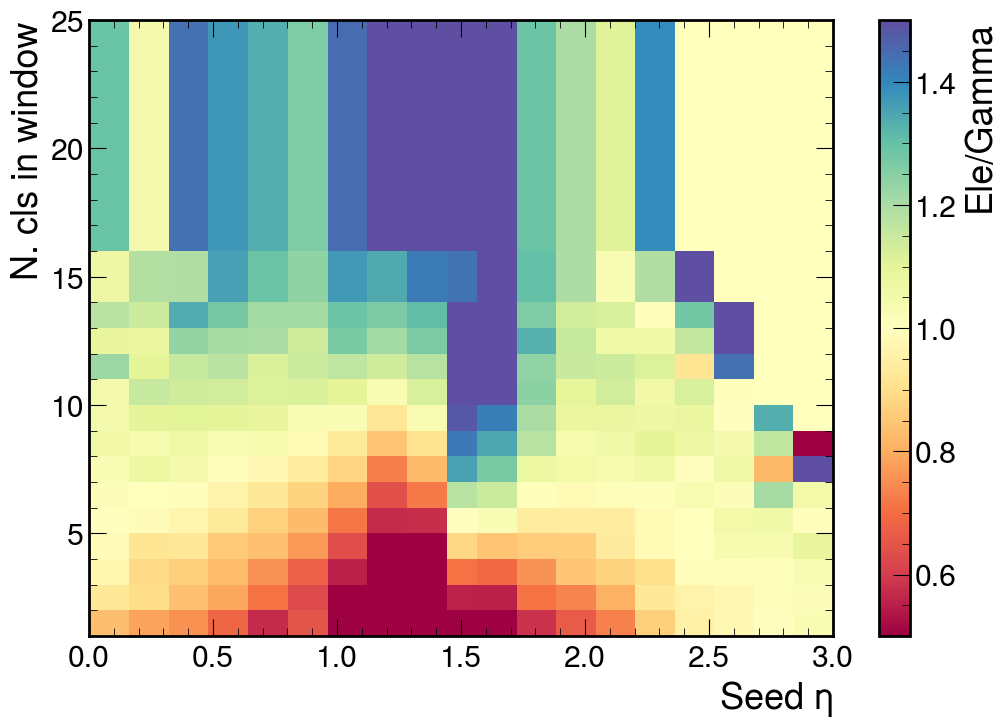

In [374]:
bins_eta = np.concatenate([np.linspace(0, 1.4442,10),  np.linspace(1.566, 3., 10)])
bins_ncls = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,25]


f, ax, = plt.subplots(1,figsize=(12,8), dpi=100)
c_ele, bx, by  = np.histogram2d(ak.to_numpy(abs(df_ele.seed_features.seed_eta)),
                                ak.to_numpy(df_ele.window_metadata.ncls), 
                                  bins=[bins_eta, bins_ncls])
c_gamma, bx, by  = np.histogram2d(ak.to_numpy(abs(df_gamma.seed_features.seed_eta)),
                                  ak.to_numpy(df_gamma.window_metadata.ncls), 
                                   bins=[bins_eta, bins_ncls])

w_num = c_ele
w_denom = c_gamma
num_var = c_ele
denom_var = c_gamma

ratio= np.where( (w_denom>0)&(w_num>0),
                     w_num/w_denom,
                     1.) 
ratio_err =  np.where( (w_denom>0)&(w_num>0),
                           np.sqrt((1/w_denom)**2 * num_var + (w_num/w_denom**2)**2 * denom_var),
                           0.)
mesh = ax.pcolormesh(bx, by, ratio.T, cmap="Spectral", vmin=0.5, vmax=1.5)

ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. cls in window")
plt.colorbar(mesh,ax=ax, label="Ele/Gamma")


f.savefig(output_folder + f"/seed_eta_ncsltot_comparison_ratio.png")
f.savefig(output_folder + f"/seed_eta_ncsltot_comparison_ratio.pdf")
f.savefig(output_folder + f"/seed_eta_ncsltot_comparison_ratio.svg")

h_weight = hist.Hist(
            hist.axis.Variable(bins_eta, name="seed_eta", label="Seed $\eta$"),
            hist.axis.Variable(bins_ncls, name="ncls", label="Ncls in window"),
            storage="weight",
            data=np.concatenate([ratio[:,:,None], ratio_err[:,:,None]], axis=-1))

 # Exporting it to correctionlib
import correctionlib, rich
import correctionlib.convert
# without a name, the resulting object will fail validation
h_weight.name = "photon_to_electron_weight"
h_weight.label = "weight"
clibcorr = correctionlib.convert.from_histogram(h_weight)
clibcorr.description = "Reweight of photons to electron"

# set overflow bins behavior (default is to raise an error when out of bounds)
clibcorr.data.flow = "clamp"

cset = correctionlib.schemav2.CorrectionSet(
    schema_version=2,
    description="Reweight of photons to electron",
    corrections=[clibcorr],
)
rich.print(cset)

with open(f"./reweightings/photon_to_electron_v9_calomatched.json", "w") as fout:
    fout.write(cset.json(exclude_unset=True))


### Try the application of the weights

In [375]:
cset = correctionlib.CorrectionSet.from_file("./reweightings/photon_to_electron_v9_calomatched.json")
corr = cset["photon_to_electron_weight"]

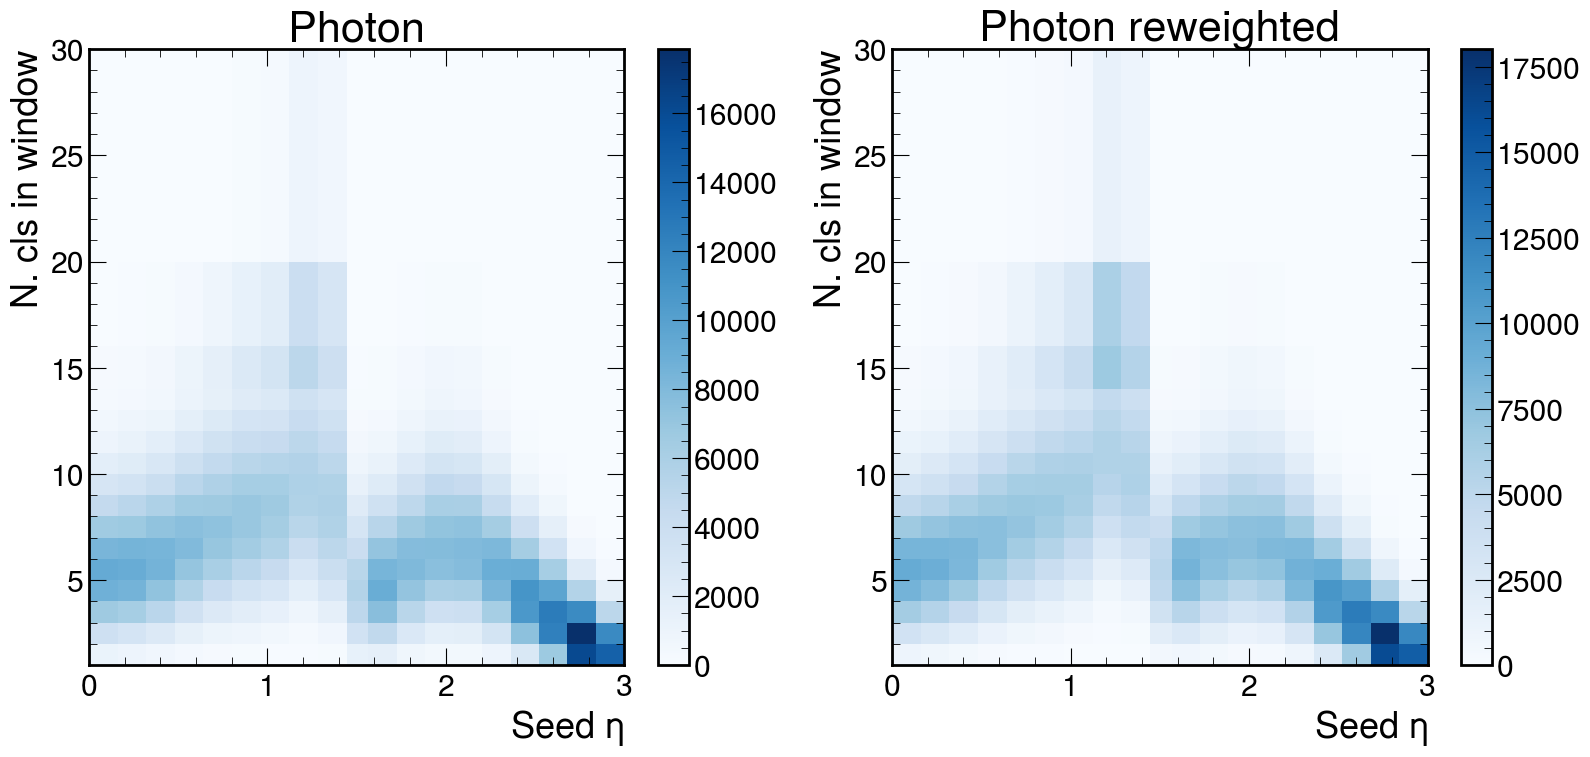

In [376]:
bins_et = np.concatenate([np.linspace(0, 1.4442,10),  np.linspace(1.566, 3, 10)])
bins_ncls = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,20,30]


f, (ax,ay) = plt.subplots(1,2,figsize=(19,8), dpi=100)
c, h, b , I =  ax.hist2d(ak.to_numpy(abs(df_gamma.seed_features.seed_eta)),
                         ak.to_numpy(df_gamma.window_metadata.ncls), 
          bins=[bins_et, bins_ncls])
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("N. cls in window")
ax.set_title("Photon")
plt.colorbar(I, ax=ax)

w = corr.evaluate(ak.to_numpy(abs(df_gamma.seed_features.seed_eta)),
                  ak.to_numpy(df_gamma.window_metadata.ncls))
c, h, b , I =  ay.hist2d(ak.to_numpy(abs(df_gamma.seed_features.seed_eta)),
                         ak.to_numpy(df_gamma.window_metadata.ncls),  
           weights=w, bins=[bins_et, bins_ncls],)

ay.set_xlabel("Seed $\eta$")
ay.set_ylabel("N. cls in window")
ay.set_title("Photon reweighted")
plt.colorbar(I, ax=ay)


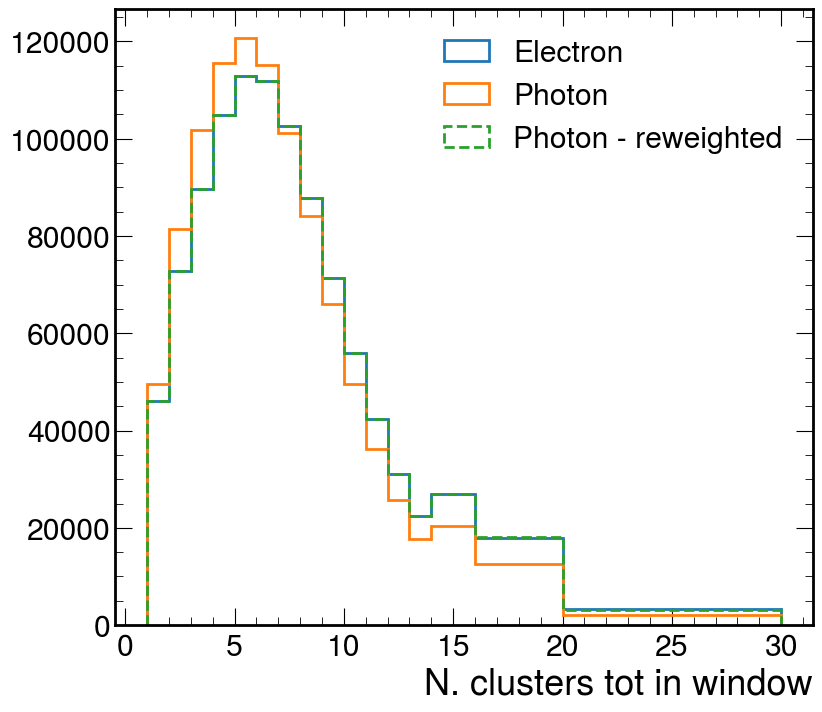

In [377]:
f, ax, = plt.subplots(1,figsize=(9,8), dpi=100)

ax.hist( ak.to_numpy(df_ele.window_metadata.ncls), bins=bins_ncls,linewidth=2,
         histtype="step", label="Electron")
ax.hist( ak.to_numpy(df_gamma.window_metadata.ncls), bins=bins_ncls,linewidth=2,
         histtype="step", label="Photon")
ax.hist( ak.to_numpy(df_gamma.window_metadata.ncls), weights=w,bins=bins_ncls,
         histtype="step", label="Photon - reweighted", linewidth=2, linestyle="dashed")
ax.legend()
ax.set_xlabel("N. clusters tot in window")

f.savefig(output_folder + f"/photon_reweight_ncls.png")
f.savefig(output_folder + f"/photon_reweight_ncls.pdf")
f.savefig(output_folder + f"/photon_reweight_ncls.svg")

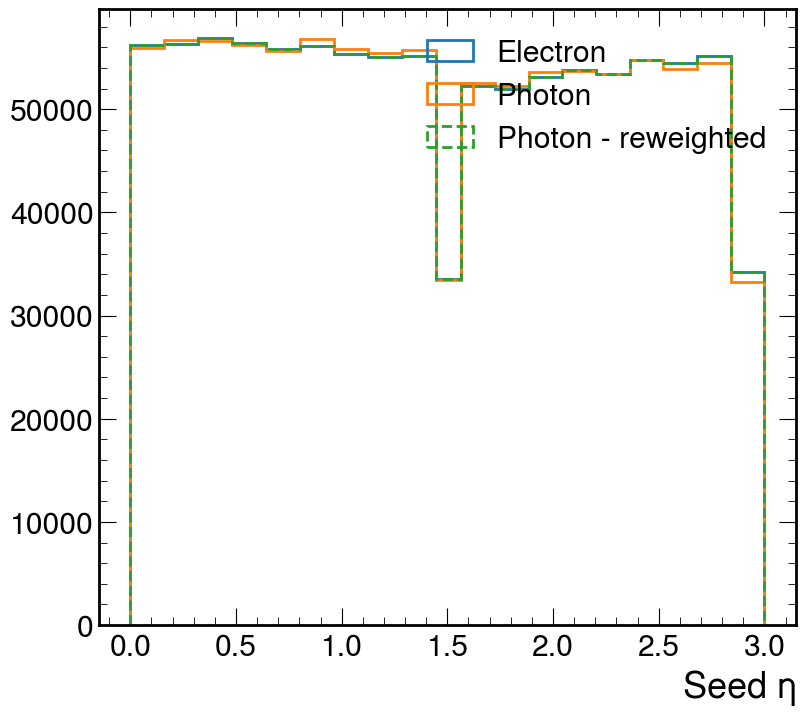

In [378]:
f, ax, = plt.subplots(1,figsize=(9,8), dpi=100)

ax.hist( ak.to_numpy(abs(df_ele.seed_features.seed_eta)), bins=bins_eta,linewidth=2,
         histtype="step", label="Electron")
ax.hist( ak.to_numpy(abs(df_gamma.seed_features.seed_eta)), bins=bins_eta,linewidth=2,
         histtype="step", label="Photon")
ax.hist( ak.to_numpy(abs(df_gamma.seed_features.seed_eta)), weights=w, bins=bins_eta,
         histtype="step", label="Photon - reweighted", linewidth=2, linestyle="dashed")
ax.legend()
ax.set_xlabel("Seed $\eta$")

f.savefig(output_folder + f"/photon_reweight_eta.png")
f.savefig(output_folder + f"/photon_reweight_eta.pdf")
f.savefig(output_folder + f"/photon_reweight_eta.svg")

In [ ]:
f, ax, = plt.subplots(1,figsize=(9,8), dpi=100)
bins_et = np.linspace(0.,100.,60)

ax.hist( ak.to_numpy(df_ele.seed_features.et_seed), bins=bins_et,linewidth=2,
         histtype="step", label="Electron")
ax.hist( ak.to_numpy(df_gamma.seed_features.et_seed), bins=bins_et,linewidth=2,
         histtype="step", label="Photon")
ax.hist( ak.to_numpy(df_gamma.seed_features.et_seed), weights=w, bins=bins_et,
         histtype="step", label="Photon - reweighted", linewidth=2, linestyle="dashed")
ax.legend()
ax.set_xlabel("Seed $E_T$")

f.savefig(output_folder + f"/photon_reweight_et.png")
f.savefig(output_folder + f"/photon_reweight_et.pdf")
f.savefig(output_folder + f"/photon_reweight_et.svg")

## Seed $E_T$ flattening